In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm #forward selection

from sklearn import preprocessing
from sklearn import linear_model  
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE #greedy variable selection
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from imblearn import  over_sampling #unbalanced data


Using TensorFlow backend.


In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
import math

In [4]:
#import warnings
#warnings.filterwarnings("ignore")

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
from sklearn.metrics import classification_report

In [7]:
import re

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [238]:
from sklearn.linear_model import Lasso

In [9]:
print(os.getcwd())

C:\Users\xingxuan_dell\1UCD_MSBA\BAX 452\Homework2


# Build visualizations and plots to see how the dependent variable varies with some of the other variables, such as 'education', 'marital-status', 'occupation', etc and study other interrelationships of the variables. Use them to tell a story/stories.

In [10]:
income = pd.read_csv(r"D:/Winter 2020/BAX 452 Machine Learning/Homework 2/income_data.csv", sep=r'\s*,\s*', engine='python')
income.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [396]:
categoricals=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [6]:
for cat in categoricals:
    print(cat)
    print(len(income[cat].unique()))
    print(income[cat].unique())

workclass
9
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
16
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status
7
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
15
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship
6
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race
5
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
2
['Male' 'Female']
native-country
42
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 

## Age - Distplot

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

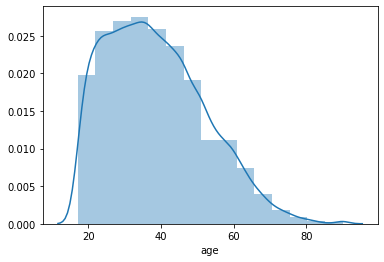

In [8]:
#income.workclass.groupby(income['workclass']).count()
sns.distplot(income['age'],bins=15,kde=True, rug=False)


income.age.describe()
#income.age.mode()

## fnlwgt - Distplot

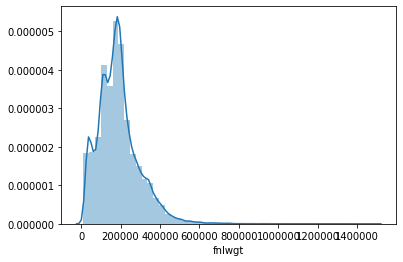

In [9]:
sns.distplot(income['fnlwgt'],kde=True, rug=False)

#income.fnlwgt.describe()

## Education-num - Distplot

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

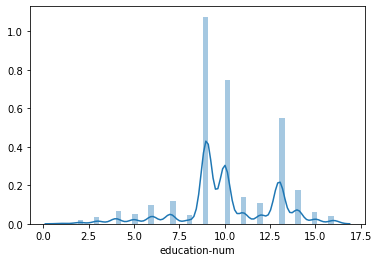

In [10]:
sns.distplot(income['education-num'],kde=True, rug=False)

income['education-num'].describe()

In [10]:
df=income.loc[income['education']=='Bachelors']
df['education-num'].unique()

array([13], dtype=int64)

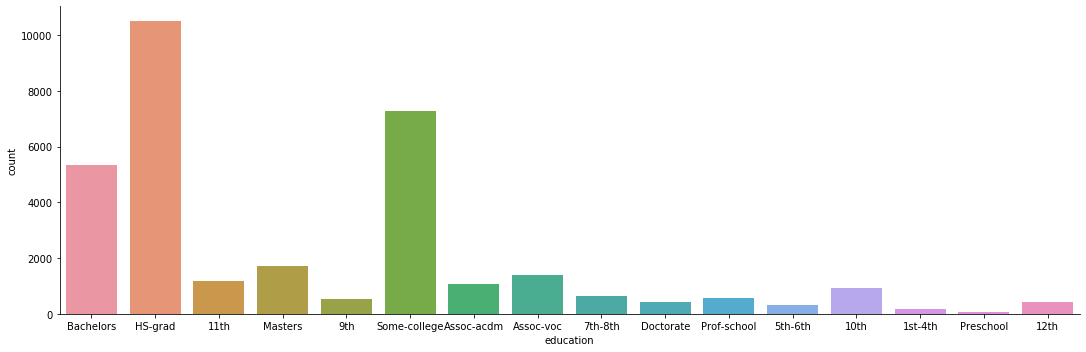

In [39]:
fig=sns.catplot(x='education',kind='count',height=5, 
    aspect=3,data=income)

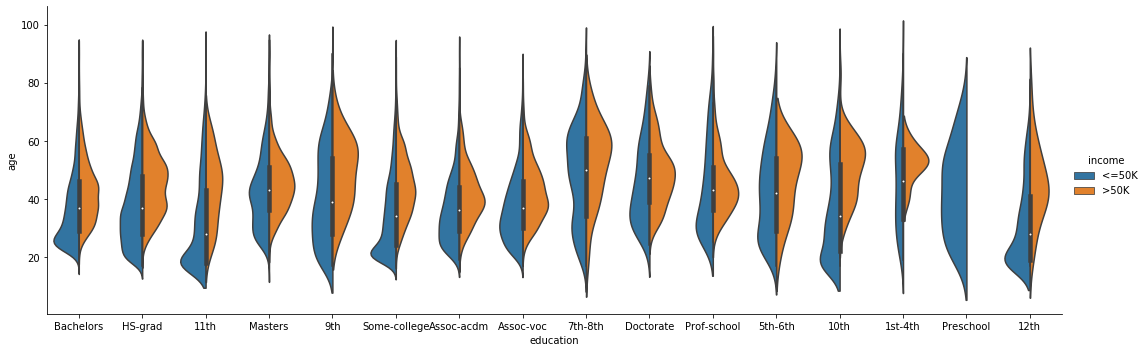

In [48]:
sns.catplot(x="education", y="age", hue="income",
            kind="violin", split=True,height=5,aspect=3, data=income);

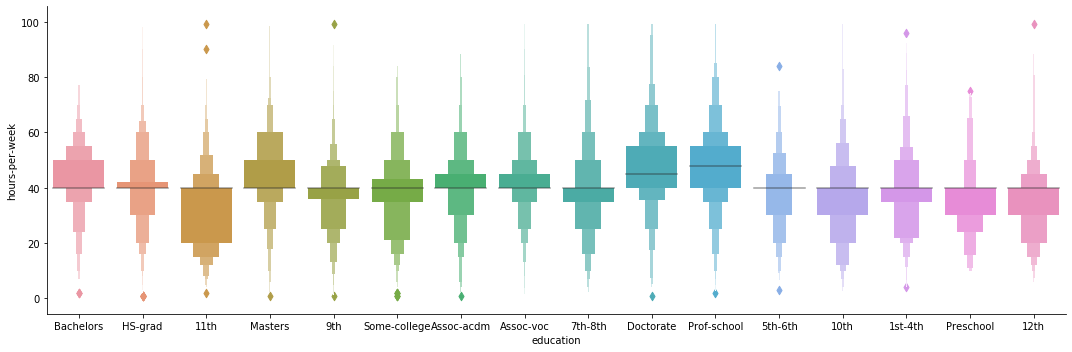

In [50]:
sns.catplot(x="education", y="hours-per-week", 
            kind="boxen", height=5,aspect=3, data=income);

## Hours-per-week - Distplot

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

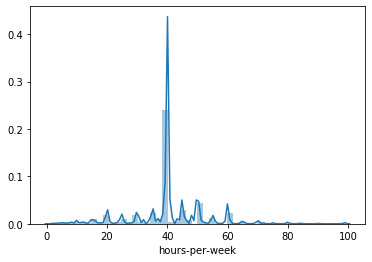

In [14]:
sns.distplot(income['hours-per-week'],kde=True, rug=False)

income['hours-per-week'].describe()

People who did not HS grad start working earlier than others(under 20 years old) with the income less than 50K. Their income will be increased above 50K later, but the highest peak (around 57 years old) is later than other education levals. 

People with Bachelor or college education get jobs that less than 50k after graduates, but the income will increase soon. 

In short, with the age increase people with less than 50k will decrease. 

People from Not-HS-Grad, Doctorate, and Prof-school are working much longer(many people earn income after 70 years old) than others.It is not suprise in doctorate and prof-school case since their job may related to lecturer in universities or researcher. But we can also see that there are a lot of proportion of them earn less than 50k. 

## Capital - Distplot

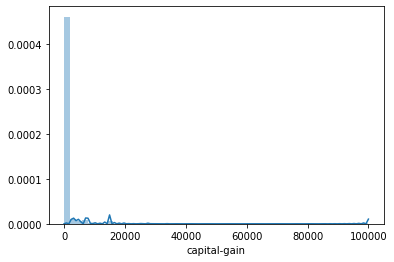

In [15]:
sns.distplot(income['capital-gain'])

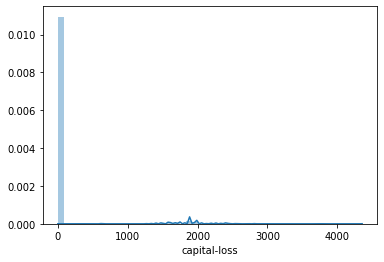

In [16]:
sns.distplot(income['capital-loss'])

In [25]:
#Interactive plot
#import plotly.figure_factory as ff
#x=[income['age']]
#name=['income']
#fig = ff.create_distplot(x, name)
#fig.show()

## Age*Hours-per-week - Scatterplot & kdeplot

### Sex

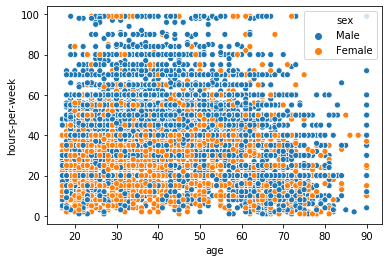

In [17]:
sns.scatterplot(x='age',y='hours-per-week',hue='sex',data=income)

Text(3.8, 4.5, 'Male')

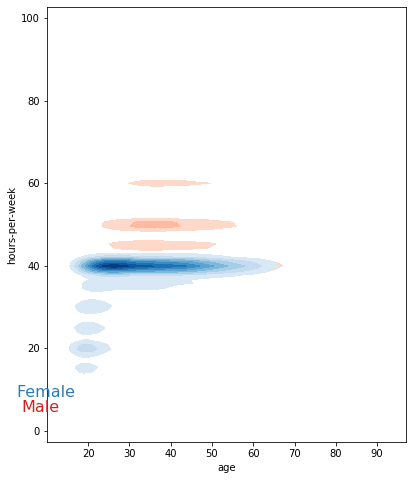

In [18]:
# Subset the income dataset by species
Male = income.query("sex == 'Male'")
Female = income.query("sex == 'Female'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(Male.age, Male['hours-per-week'],
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(Female.age, Female['hours-per-week'],
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "Female", size=16, color=blue)
ax.text(3.8, 4.5, "Male", size=16, color=red)

We can see many young females works less than 40 hours per week, which may due to giving birth of babies. Most females and males are working at or around the 40 hours per week with various ages. Only males work over hours which may be a part of reason why males' income is higher than females'. Also, not all ages males work overly. Older males are not working overly due to the age and lack of energy. But another explansion could be they died. 

### Income

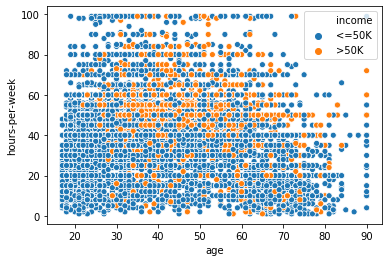

In [19]:
sns.scatterplot(x='age',y='hours-per-week',hue='income',data=income)

Text(3.8, 4.5, '>50K')

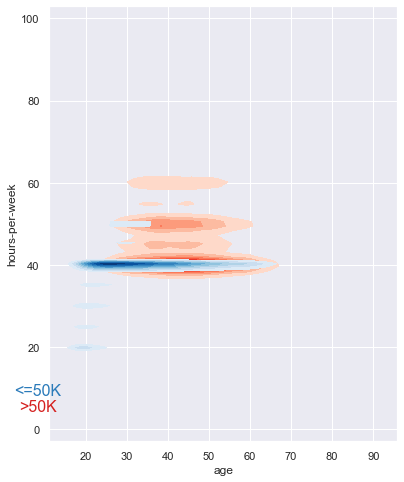

In [67]:
# Subset the iris dataset by species
LOW = income.query("income == '<=50K'")
HIGH = income.query("income == '>50K'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots

ax = sns.kdeplot(HIGH.age, HIGH['hours-per-week'],
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(LOW.age, LOW['hours-per-week'],
                 cmap="Blues", shade=True, shade_lowest=False)


# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "<=50K", size=16, color=blue)
ax.text(3.8, 4.5, ">50K", size=16, color=red)

Can working over hours can lead higher income? The answer is yes.

#### Workclass

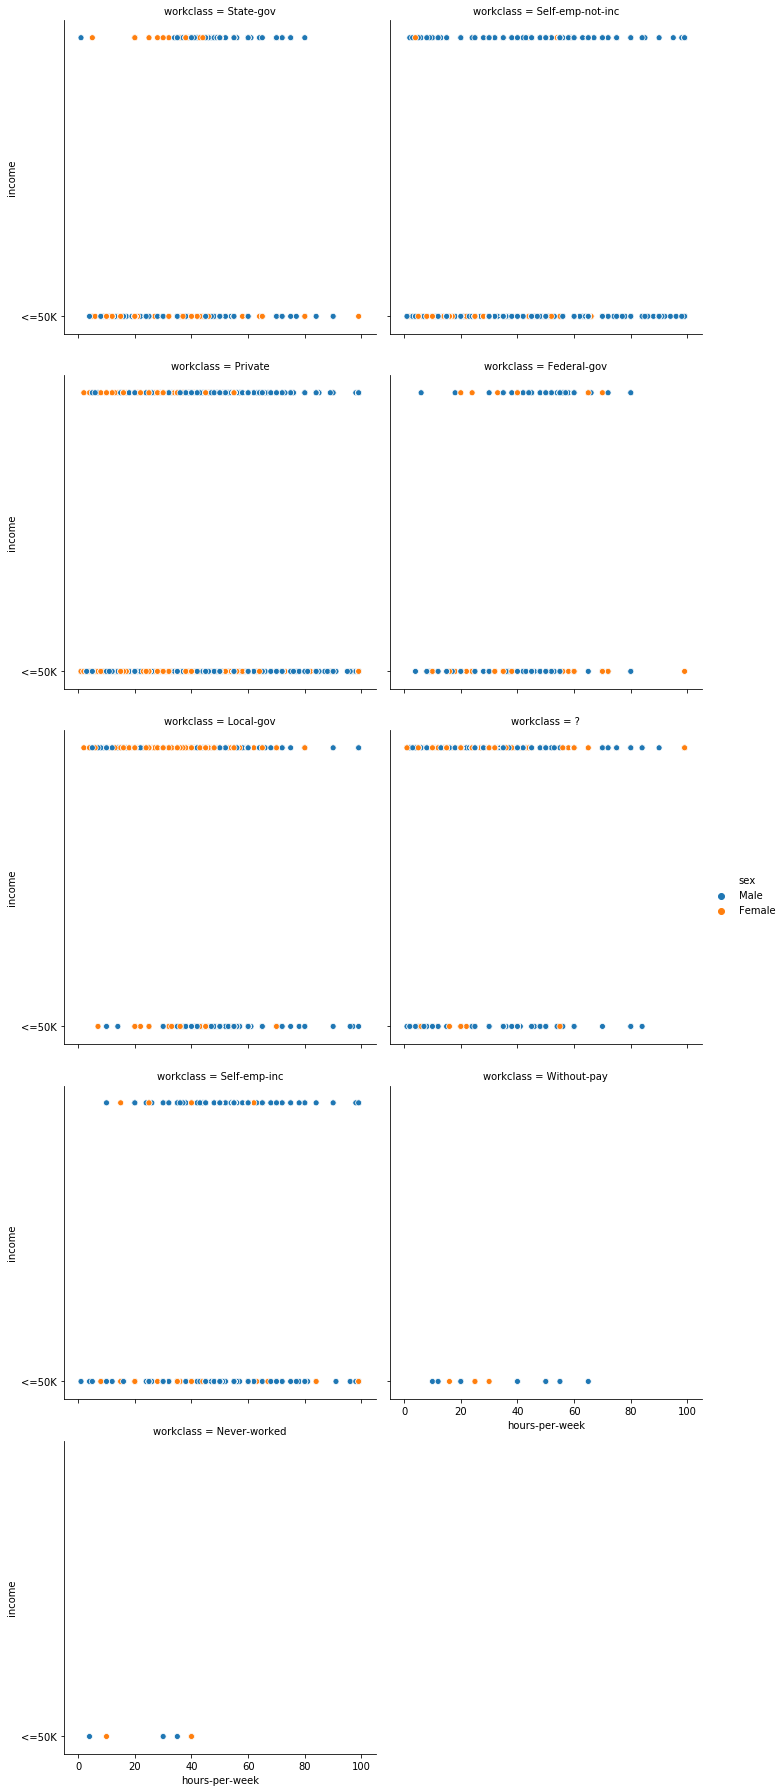

In [47]:
sns.relplot(x="hours-per-week", y="income", hue="sex",
            col="workclass", col_wrap=2,data=income);

## Age*Capital - Scatterplot

### Income

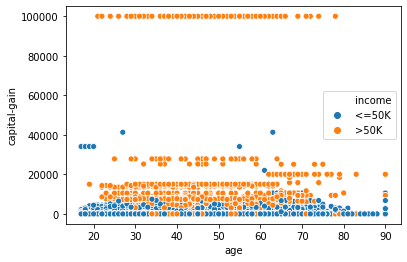

In [20]:
sns.scatterplot(x='age',y='capital-gain',hue='income',data=attempt1)

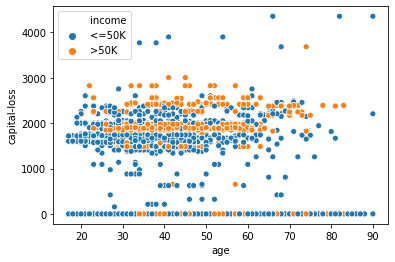

In [21]:
sns.scatterplot(x='age',y='capital-loss',hue='income',data=attempt1)

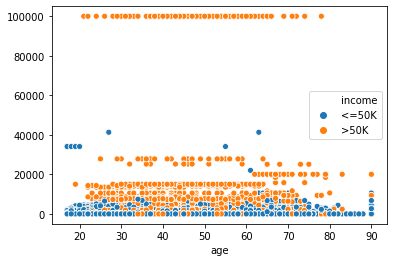

In [37]:
invest=income['capital-gain']+abs(income['capital-loss'])
#invest.sum()
#income['capital-gain'].sum()
sns.scatterplot(x=income['age'],y=invest,hue=income['income'])

## Workclass - Barplot

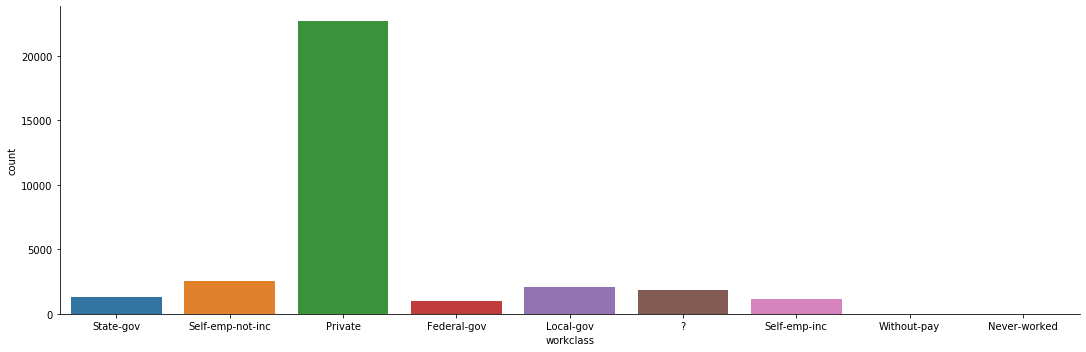

In [38]:

fig=sns.catplot(x='workclass',kind='count',height=5, 
    aspect=3,data=income)


## Marital-status - Barplot

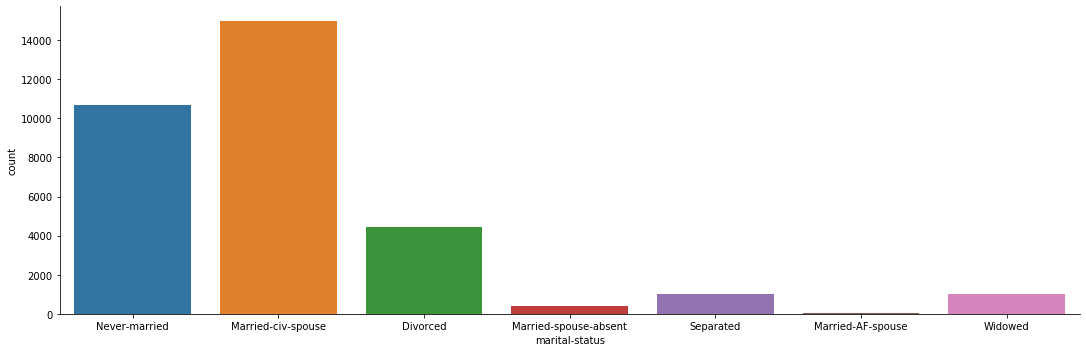

In [40]:
fig=sns.catplot(x='marital-status',kind='count',height=5, 
    aspect=3,data=income)

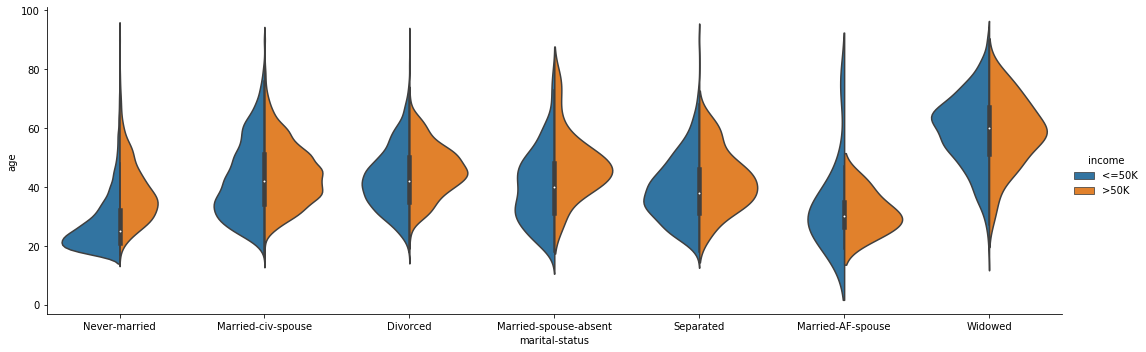

In [49]:
sns.catplot(x="marital-status", y="age", hue="income",
            kind="violin", split=True,height=5,aspect=3, data=income);

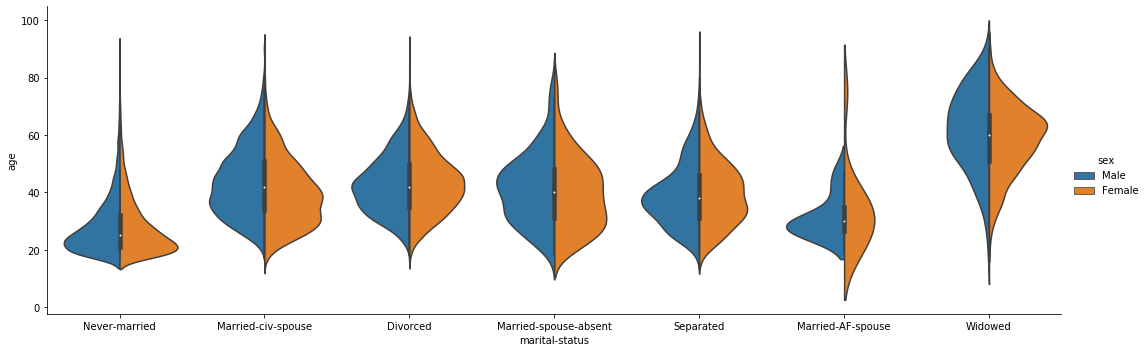

In [54]:
sns.catplot(x="marital-status", y="age", hue="sex",
            kind="violin", split=True,height=5,aspect=3, data=income);

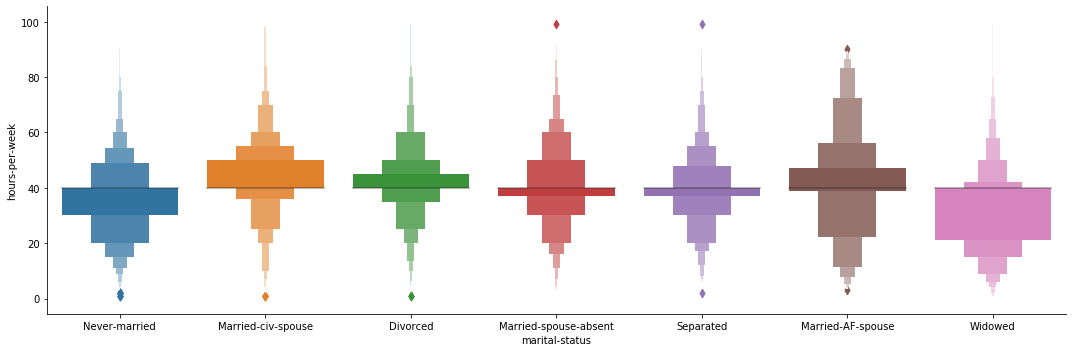

In [55]:
sns.catplot(x="marital-status", y="hours-per-week", 
            kind="boxen", height=5,aspect=3, data=income);

## Occupation - Barplot

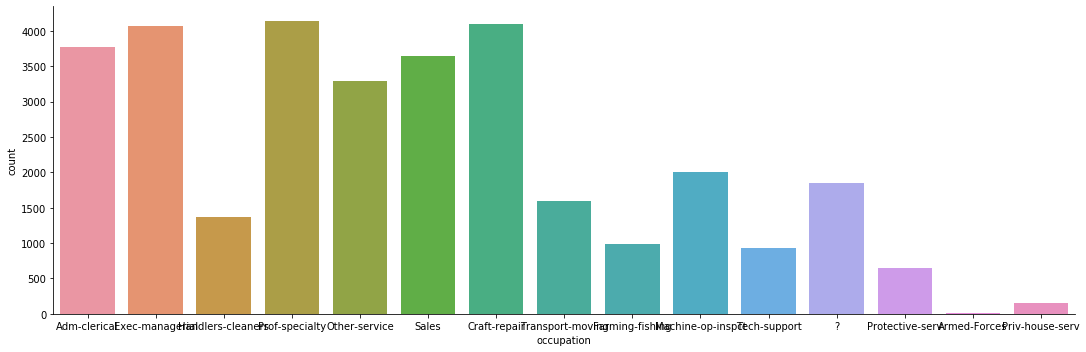

In [41]:
fig=sns.catplot(x='occupation',kind='count',height=5, 
    aspect=3,data=income)

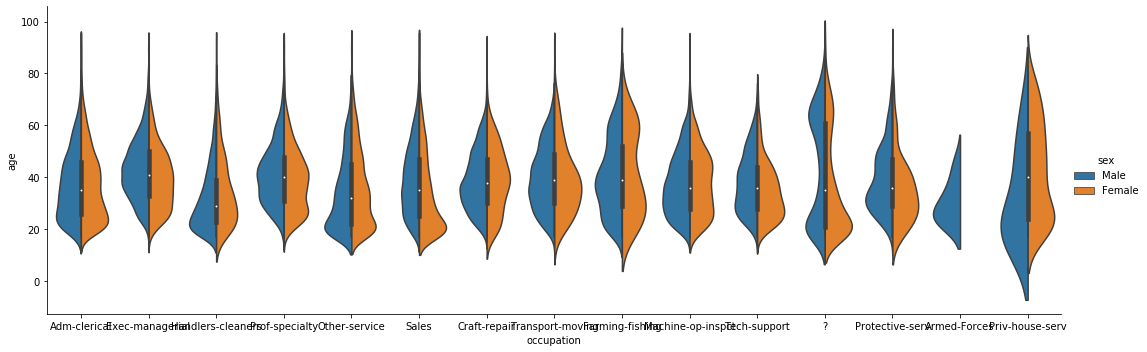

In [51]:
sns.catplot(x="occupation", y="age", hue="sex",
            kind="violin",split=True,height=5,aspect=3, data=income);

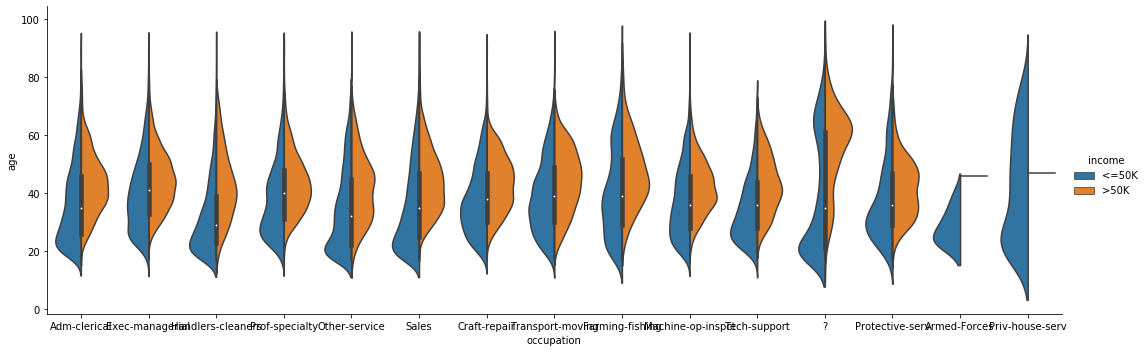

In [52]:
sns.catplot(x="occupation", y="age", hue="income",
            kind="violin",split=True,height=5,aspect=3, data=income);

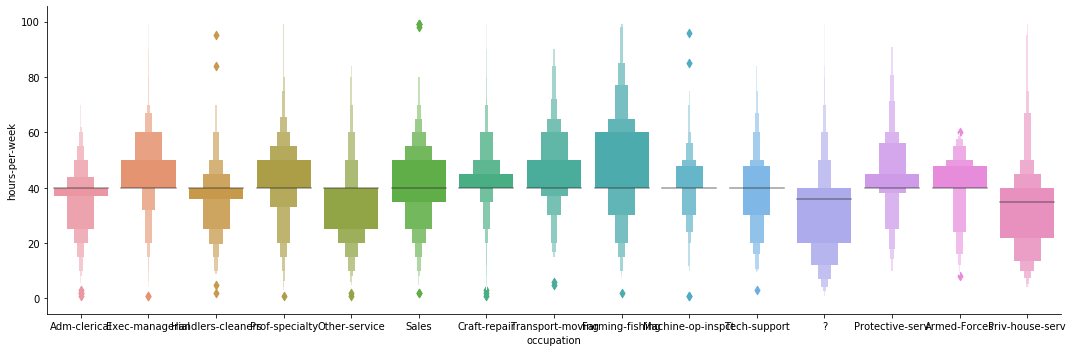

In [53]:
sns.catplot(x="occupation", y="hours-per-week", 
            kind="boxen",height=5,aspect=3, data=income);

## Relationship - Barplot

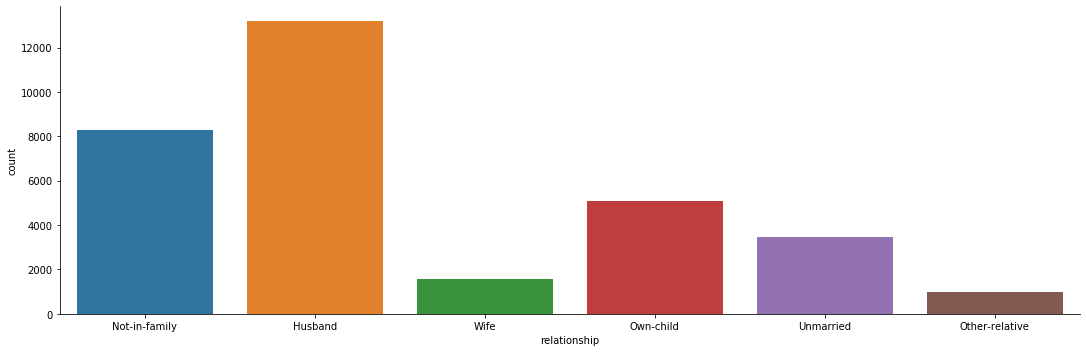

In [42]:
fig=sns.catplot(x='relationship',kind='count',height=5, 
    aspect=3,data=income)

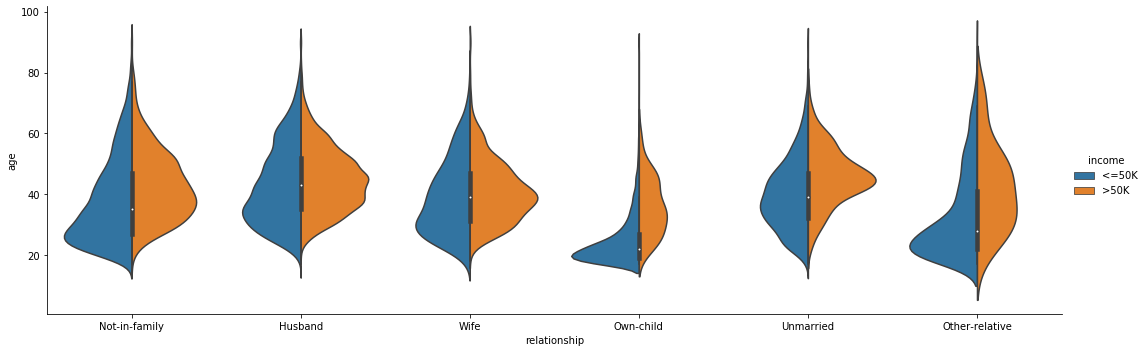

In [56]:
sns.catplot(x="relationship", y="age", hue="income",
            kind="violin",split=True,height=5,aspect=3, data=income);

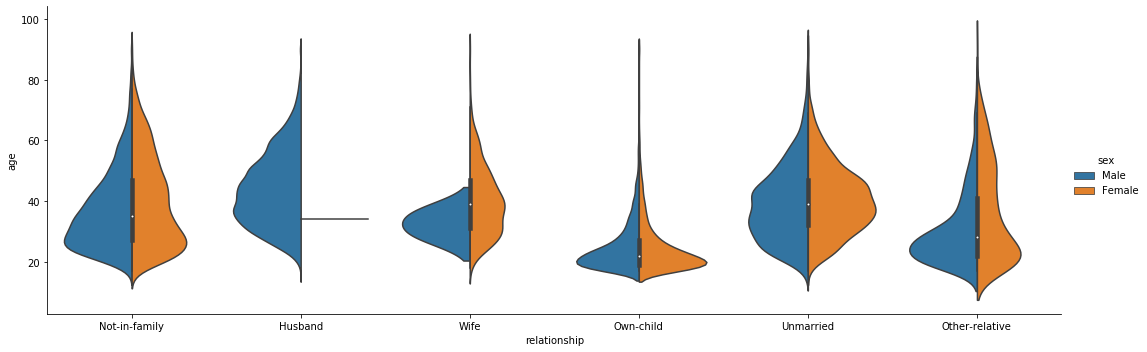

In [57]:
sns.catplot(x="relationship", y="age", hue="sex",
            kind="violin",split=True,height=5,aspect=3, data=income);

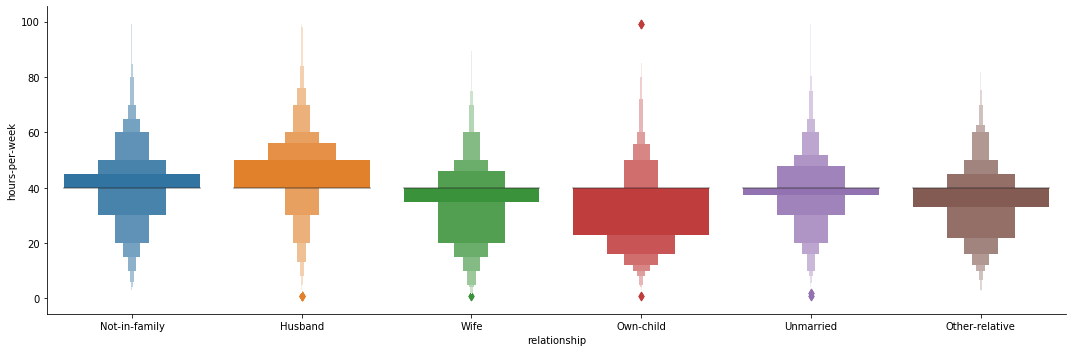

In [58]:
sns.catplot(x="relationship", y="hours-per-week", 
            kind="boxen",height=5,aspect=3, data=income);

## Race - Barplot

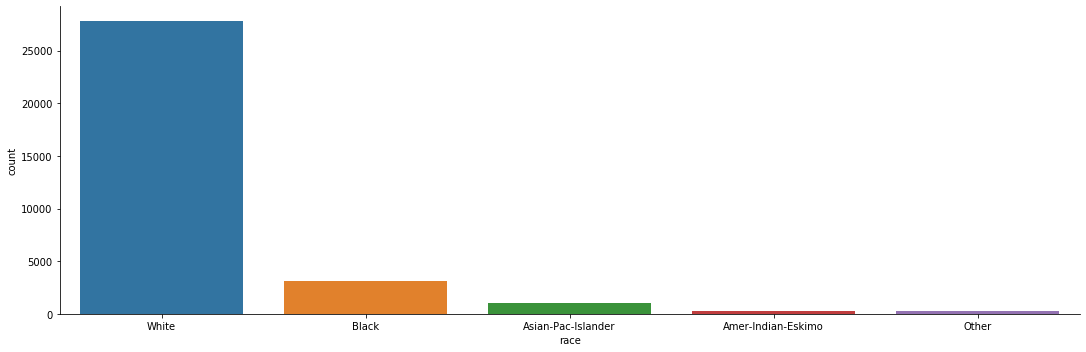

In [43]:
fig=sns.catplot(x='race',kind='count',height=5, 
    aspect=3,data=income)

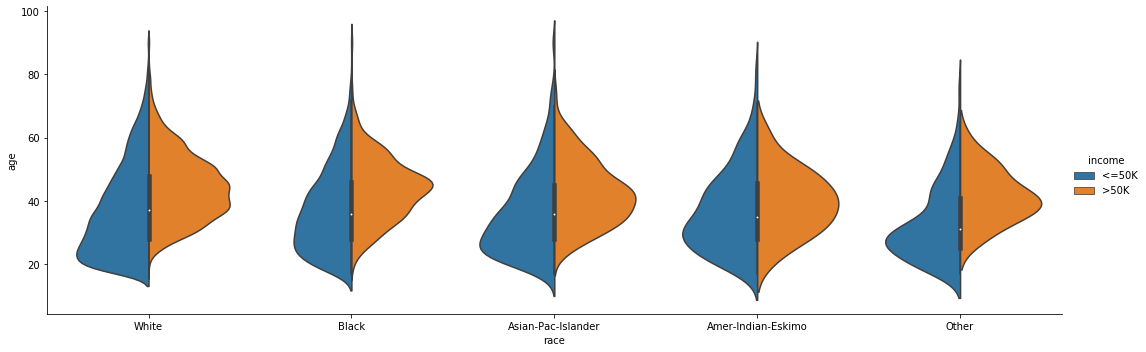

In [59]:
sns.catplot(x="race", y="age", hue="income",
            kind="violin",split=True,height=5,aspect=3, data=income);

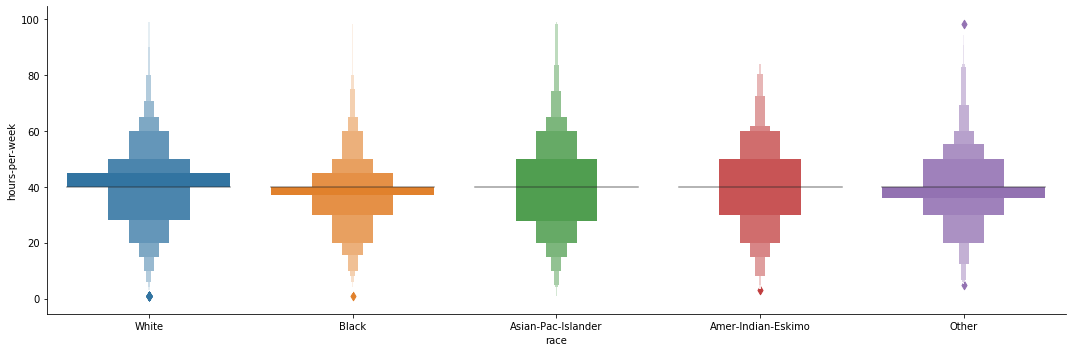

In [60]:
sns.catplot(x="race", y="hours-per-week",
            kind="boxen",height=5,aspect=3, data=income);

## Sex - Barplot

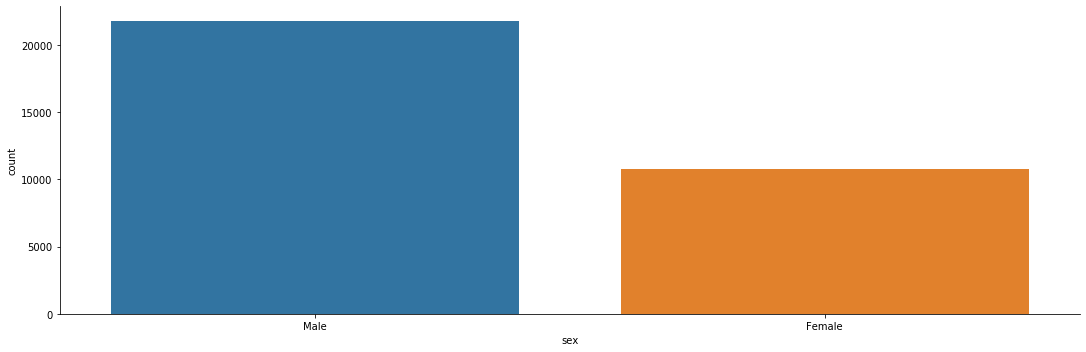

In [44]:
fig=sns.catplot(x='sex',kind='count',height=5, 
    aspect=3,data=income)

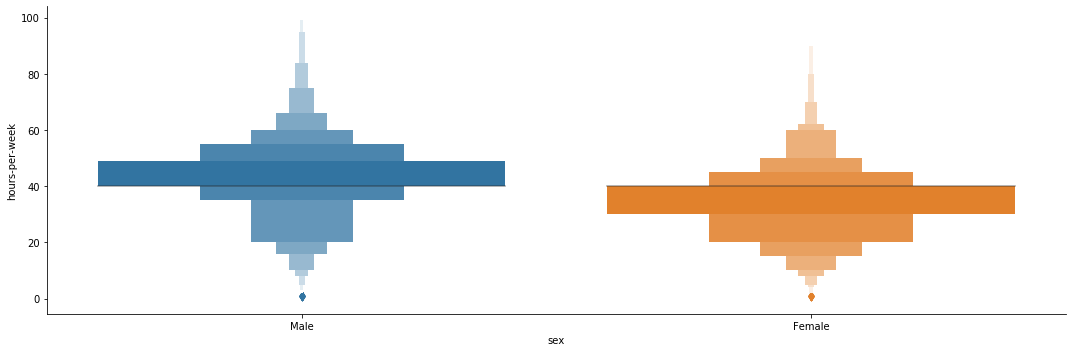

In [62]:
sns.catplot(x="sex", y="hours-per-week", 
            kind="boxen",height=5,aspect=3, data=income);

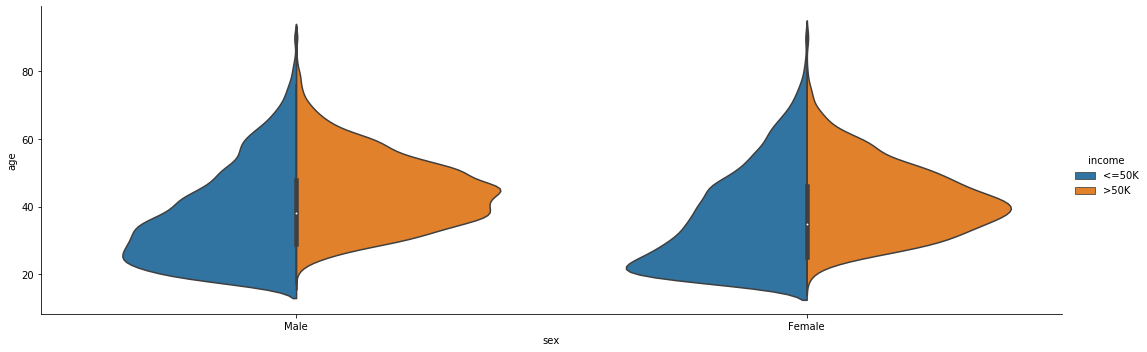

In [61]:
sns.catplot(x="sex", y="age", hue="income",
            kind="violin",split=True,height=5,aspect=3, data=income);

## Country - Barplot

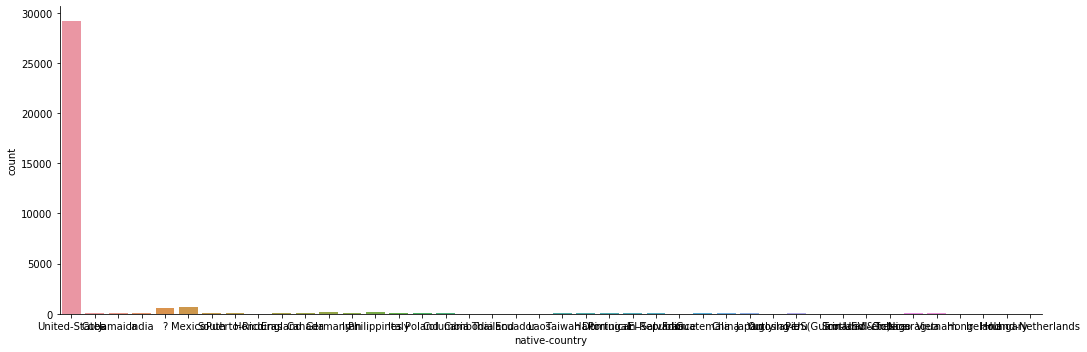

In [46]:
fig=sns.catplot(x='native-country',kind='count',height=5, 
    aspect=3,data=income)

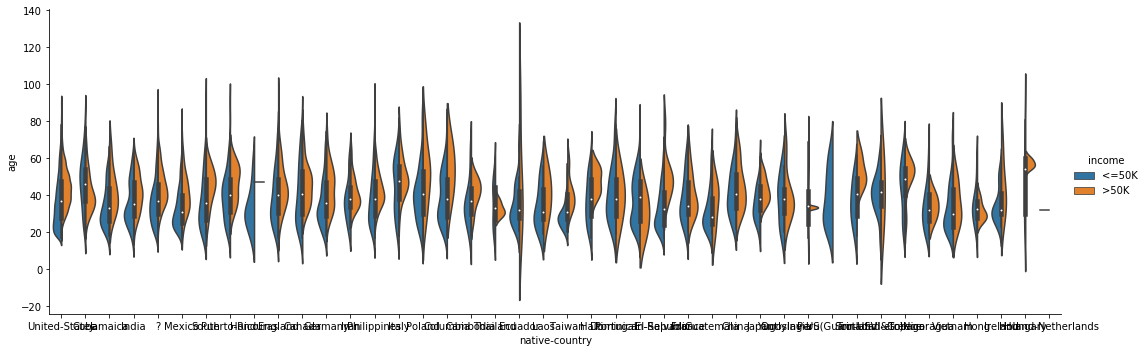

In [63]:
sns.catplot(x="native-country", y="age", hue="income",
            kind="violin",split=True,height=5,aspect=3, data=income);

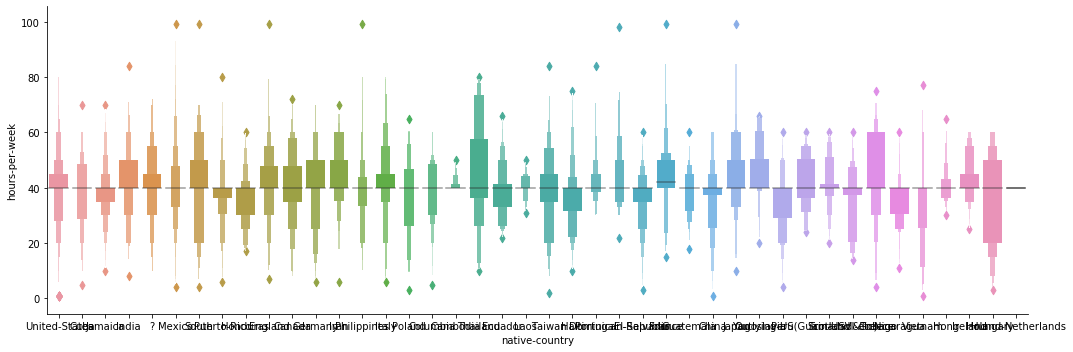

In [64]:
sns.catplot(x="native-country", y="hours-per-week", 
            kind="boxen",height=5,aspect=3, data=income);

## Conclusion:

Income
- Unimportant factors: country, race, sex
- Collinearity: sex, education num
- Important factors: age, work hour per week, workclass, education, marital-status, occupation, relationship 
- Not sure: invest, capital gain or loss

Work hours
- Important factors: age, sex, country,race,relationship, occupation, marital-status, education, workclass


# How would you transform your categorical variables and why? Which of them would you transform? If you do not want to transform any, justify why.

## Original 

In [11]:
original=income.copy()

In [12]:
factors = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

#Checking for nulls
original.isnull().values.any()
#in case nulls need to be handled
for factor in factors:
    original[factor].fillna(value=original[factor].mode()[0], inplace=True)


In [13]:
original['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [14]:
#merging levels of education
original['education']=np.where(original['education'] =='11th', 'Not-HS-Grad', original['education'])
original['education']=np.where(original['education'] =='9th', 'Not-HS-Grad', original['education'])
original['education']=np.where(original['education'] =='7th-8th', 'Not-HS-Grad', original['education'])
original['education']=np.where(original['education'] =='5th-6th', 'Not-HS-Grad', original['education'])
original['education']=np.where(original['education'] =='10th', 'Not-HS-Grad', original['education'])
original['education']=np.where(original['education'] =='1st-4th', 'Not-HS-Grad', original['education'])
original['education']=np.where(original['education'] =='Preschool', 'Not-HS-Grad', original['education'])
original['education']=np.where(original['education'] =='12th', 'Not-HS-Grad', original['education'])

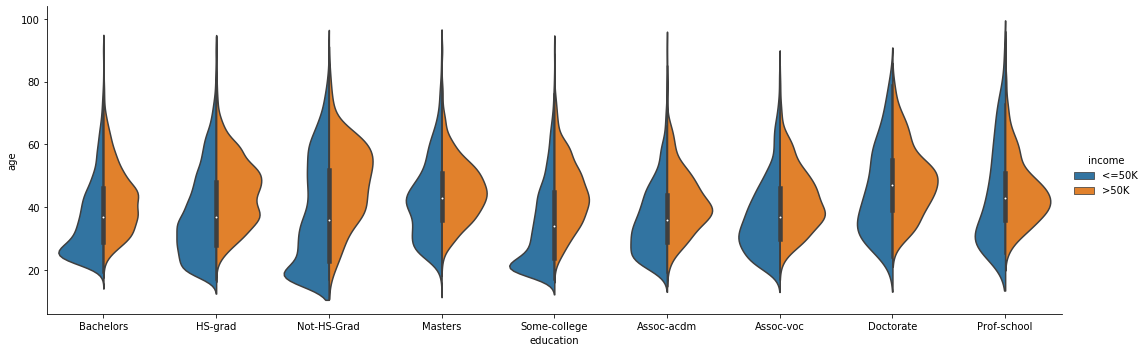

In [15]:
sns.catplot(x="education", y="age", hue="income",
            kind="violin", split=True,height=5,aspect=3, data=original);

In [16]:
#assigning levels to the values of categorical variables
income_fact = original.copy()
mapping_levels = []
for factor in factors:
    income_fact[factor] = income_fact[factor].factorize(sort = True)[0]
    mapping_levels.append(income_fact[factor].factorize(sort = True)[1])
income_fact.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          2             13               4   
1   50          6   83311          2             13               2   
2   38          4  215646          4              9               0   
3   53          4  234721          6              7               2   
4   28          4  338409          2             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              13              39       0  
2              40              39       0  
3              40              39       0  
4              40               5       0

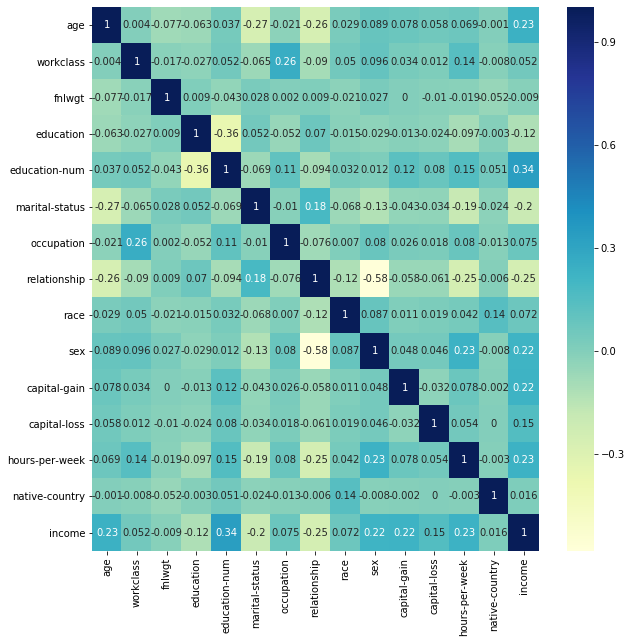

In [17]:
#correlation matrix of the data
income_fact_corr=round(income_fact.corr(),3)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(income_fact_corr, annot=True,cmap="YlGnBu")

In [18]:
for var in factors:
    if var != 'income':
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(original[var], prefix=var,drop_first=True)
        original = pd.concat([original,cat_list], axis = 1)
        original = original.drop(var, 1)
original.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  income  workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0  <=50K                      0                    0                       0   
1  <=50K                      0                    0                       0   
2  <=50K                      0                    0                       0   
3  <=50K                      0                    0                       0   
4  <=50K                      0                    0                       0   

   ...  native-country_Portugal  native-country_Puerto-Rico  \
0  ...                        0                           0   
1  ...                        0                           0   
2  ...                        0                           0   
3  ...                        0                           0   
4  ...                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 94 columns]

## Attempt 1

In [291]:
attempt1=income.copy()

In [292]:
factors_att = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
#Checking for nulls
attempt1.isnull().values.any()
#in case nulls need to be handled
for factor in factors_att:
    attempt1[factor].fillna(value=attempt1[factor].mode()[0], inplace=True)

In [293]:
attempt1['occupation']=np.where(attempt1['occupation'] =='Armed-Forces', 'Others', attempt1['occupation'])
attempt1['occupation']=np.where(attempt1['occupation'] =='?', 'Others', attempt1['occupation'])

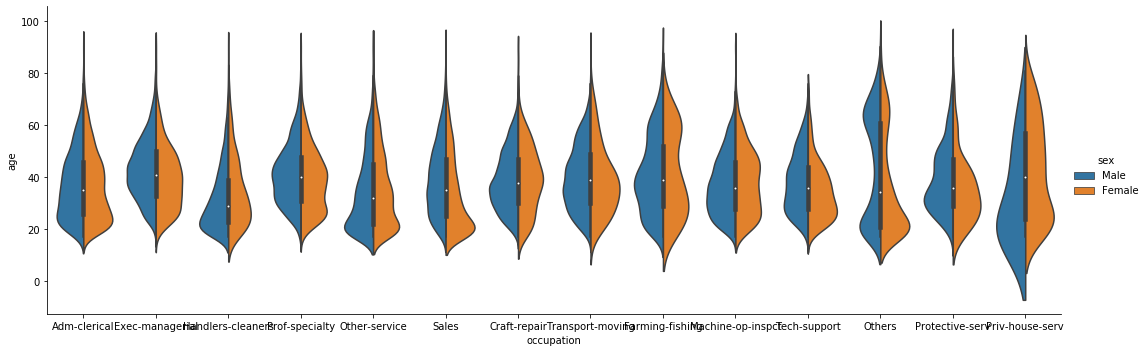

In [294]:
sns.catplot(x="occupation", y="age", hue="sex",
            kind="violin",split=True,height=5,aspect=3, data=attempt1);

In [295]:
#merging levels of education
attempt1['education']=np.where(attempt1['education'] =='11th', 'Not-HS-Grad', attempt1['education'])
attempt1['education']=np.where(attempt1['education'] =='9th', 'Not-HS-Grad', attempt1['education'])
attempt1['education']=np.where(attempt1['education'] =='7th-8th', 'Not-HS-Grad', attempt1['education'])
attempt1['education']=np.where(attempt1['education'] =='5th-6th', 'Not-HS-Grad', attempt1['education'])
attempt1['education']=np.where(attempt1['education'] =='10th', 'Not-HS-Grad', attempt1['education'])
attempt1['education']=np.where(attempt1['education'] =='1st-4th', 'Not-HS-Grad', attempt1['education'])
attempt1['education']=np.where(attempt1['education'] =='Preschool', 'Not-HS-Grad', attempt1['education'])
attempt1['education']=np.where(attempt1['education'] =='12th', 'Not-HS-Grad', attempt1['education'])

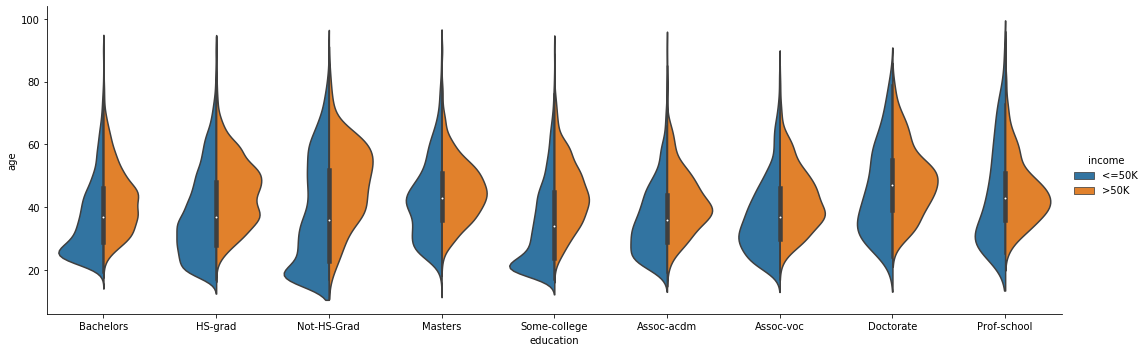

In [296]:
sns.catplot(x="education", y="age", hue="income",
            kind="violin", split=True,height=5,aspect=3, data=attempt1);

In [297]:
#merging levels of marital-status
attempt1['marital-status']=np.where(attempt1['marital-status'] =='Married-spouse-absent', 'Married', attempt1['marital-status'])
attempt1['marital-status']=np.where(attempt1['marital-status'] =='Married-AF-spouse', 'Married', attempt1['marital-status'])
attempt1['marital-status']=np.where(attempt1['marital-status'] =='Married-civ-spouse', 'Married', attempt1['marital-status'])
attempt1['marital-status']=np.where(attempt1['marital-status'] =='Divorced', 'GoneMarried', attempt1['marital-status'])
attempt1['marital-status']=np.where(attempt1['marital-status'] =='Separated', 'GoneMarried', attempt1['marital-status'])
attempt1['marital-status']=np.where(attempt1['marital-status'] =='Widowed', 'GoneMarried', attempt1['marital-status'])


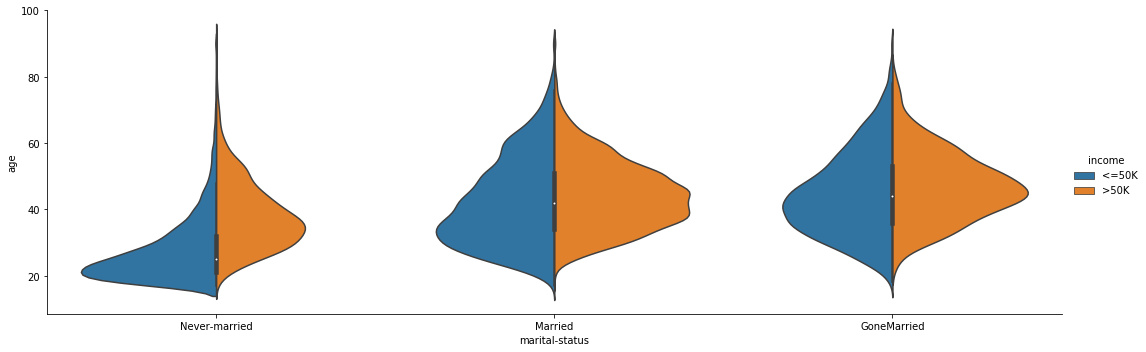

In [298]:
sns.catplot(x="marital-status", y="age", hue="income",
            kind="violin", split=True,height=5,aspect=3, data=attempt1);

In [299]:
attempt1['race']=np.where(attempt1['race'] =='Black', 'Others', attempt1['race'])
attempt1['race']=np.where(attempt1['race'] =='Asian-Pac-Islander', 'Others', attempt1['race'])
attempt1['race']=np.where(attempt1['race'] =='Amer-Indian-Eskimo', 'Others', attempt1['race'])
attempt1['race']=np.where(attempt1['race'] =='Other', 'Others', attempt1['race'])

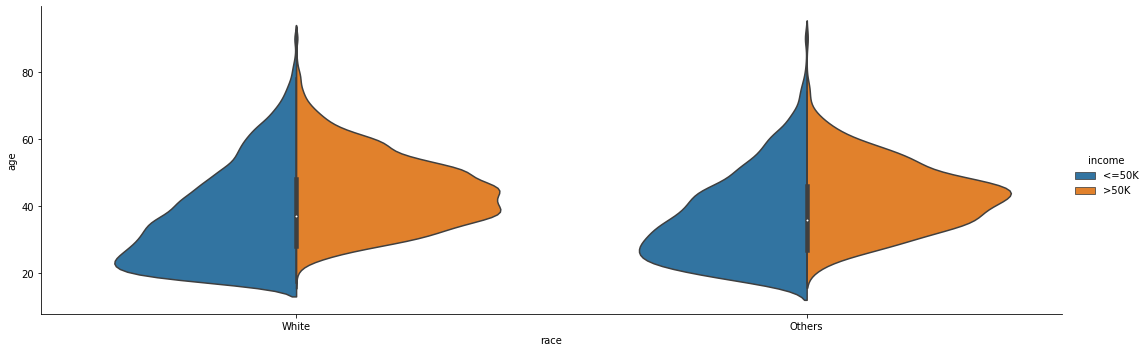

In [300]:
sns.catplot(x="race", y="age", hue="income",
            kind="violin",split=True,height=5,aspect=3, data=attempt1);

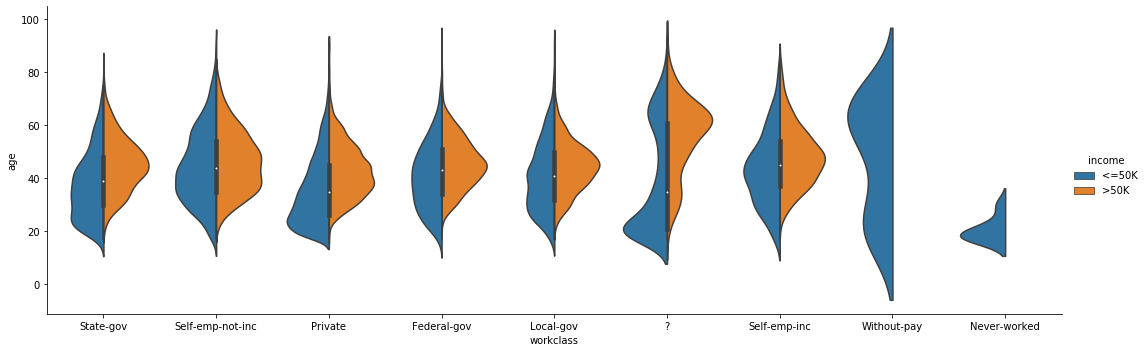

In [301]:
sns.catplot(x="workclass", y="age", hue="income",
            kind="violin", split=True,height=5,aspect=3, data=income);

In [302]:
#merging levels of workclass
attempt1['workclass']=np.where(attempt1['workclass'] =='Without-pay', 'noincome', attempt1['workclass'])
attempt1['workclass']=np.where(attempt1['workclass'] =='Never-worked', 'noincome', attempt1['workclass'])
attempt1['workclass']=np.where(attempt1['workclass'] =='?', 'noincome', attempt1['workclass'])
attempt1['workclass']=np.where(attempt1['workclass'] =='State-gov', 'gov', attempt1['workclass'])
attempt1['workclass']=np.where(attempt1['workclass'] =='Local-gov', 'gov', attempt1['workclass'])
attempt1['workclass']=np.where(attempt1['workclass'] =='Federal-gov', 'gov', attempt1['workclass'])
attempt1['workclass']=np.where(attempt1['workclass'] =='Self-emp-not-inc', 'self', attempt1['workclass'])
attempt1['workclass']=np.where(attempt1['workclass'] =='Self-emp-inc', 'self', attempt1['workclass'])

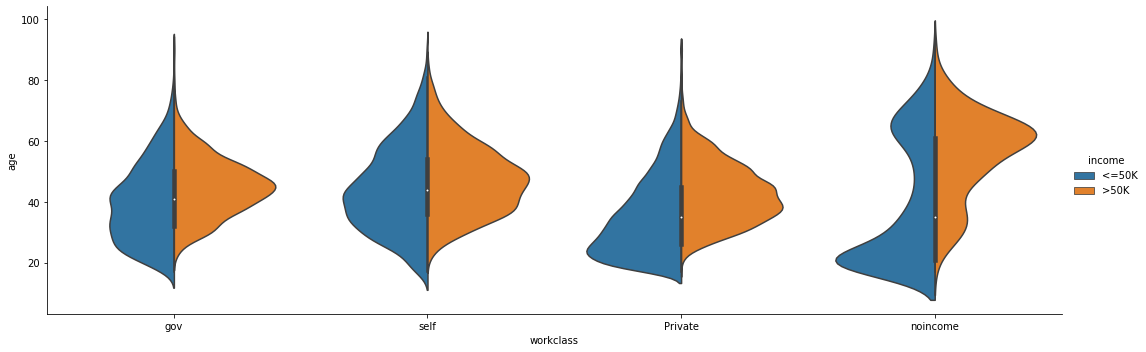

In [303]:
sns.catplot(x="workclass", y="age", hue="income",
            kind="violin", split=True,height=5,aspect=3, data=attempt1);

In [304]:
#merging levels of country
attempt1['native-country']=np.where(attempt1['native-country'] !='United-States', 'Others', attempt1['native-country'])

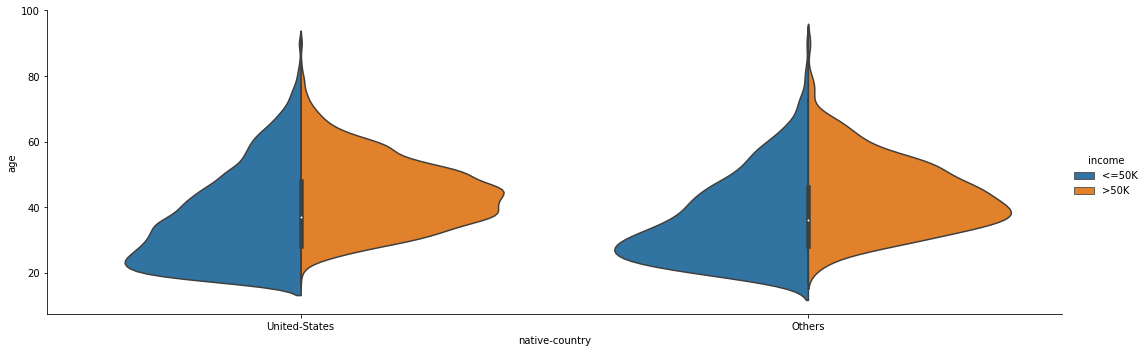

In [305]:
sns.catplot(x="native-country", y="age", hue="income",
            kind="violin", split=True,height=5,aspect=3, data=attempt1);

In [306]:
attempt1['relationship']=np.where(attempt1['relationship'] =='Husband', 'Couple', attempt1['relationship'])
attempt1['relationship']=np.where(attempt1['relationship'] =='Wife', 'Couple', attempt1['relationship'])

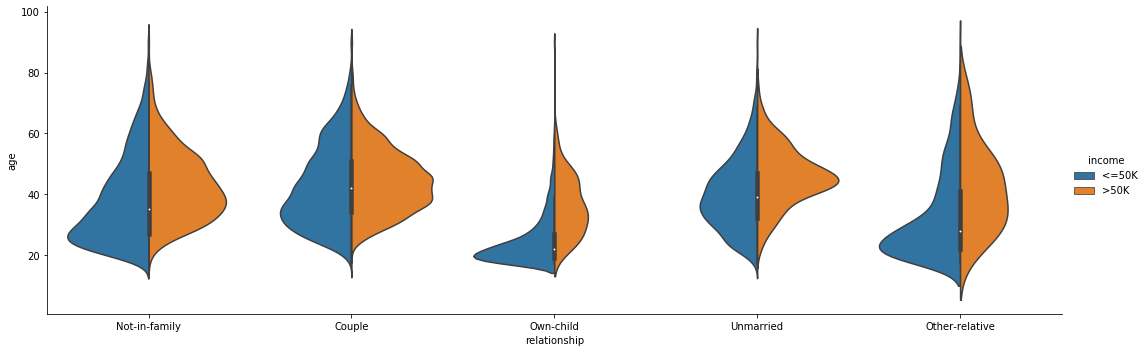

In [307]:
sns.catplot(x="relationship", y="age", hue="income",
            kind="violin",split=True,height=5,aspect=3, data=attempt1);

In [308]:
#assigning levels to the values of categorical variables
attempt1_fact = attempt1.copy()
mapping_levels_att = []
for factor in factors_att:
    attempt1_fact[factor] = attempt1_fact[factor].factorize(sort = True)[0]
    mapping_levels_att.append(attempt1_fact[factor].factorize(sort = True)[1])
attempt1_fact.head()

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          1   77516          2             13               2   
1   50          3   83311          2             13               1   
2   38          0  215646          4              9               0   
3   53          0  234721          6              7               1   
4   28          0  338409          2             13               1   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     1    1          2174             0   
1           2             0     1    1             0             0   
2           4             1     1    1             0             0   
3           4             0     0    1             0             0   
4           9             0     0    0             0             0   

   hours-per-week  native-country  income  
0              40               1       0  
1              13               1       0  
2              40               1       0  
3              40               1       0  
4              40               0       0

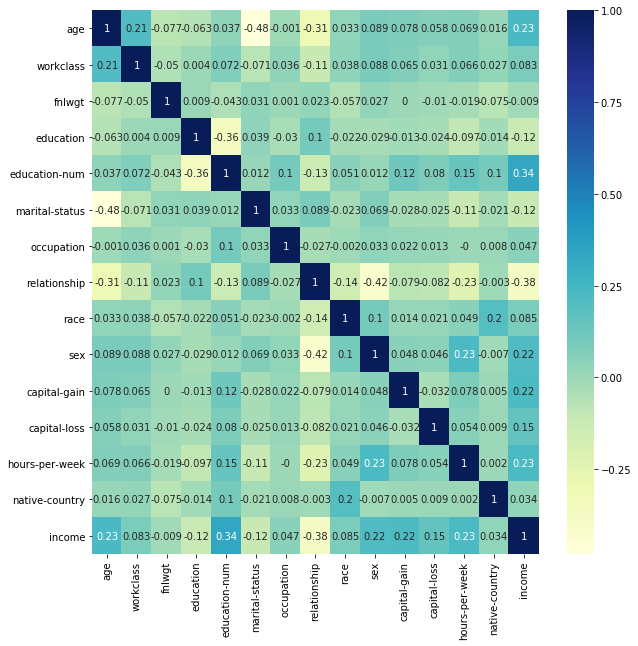

In [309]:
#correlation matrix of the data
attempt1_fact_corr=round(attempt1_fact.corr(),3)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(attempt1_fact_corr, annot=True,cmap="YlGnBu")

In [310]:
for var in factors_att:
    if var != 'income':
        att_cat_list='var'+'_'+var
        att_cat_list = pd.get_dummies(attempt1[var], prefix=var,drop_first=True)
        attempt1 = pd.concat([attempt1,att_cat_list], axis = 1)
        attempt1 = attempt1.drop(var, 1)
attempt1.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  income  workclass_gov  workclass_noincome  workclass_self  ...  \
0  <=50K              1                   0               0  ...   
1  <=50K              0                   0               1  ...   
2  <=50K              0                   0               0  ...   
3  <=50K              0                   0               0  ...   
4  <=50K              0                   0               0  ...   

   occupation_Sales  occupation_Tech-support  occupation_Transport-moving  \
0                 0                        0                            0   
1                 0                        0                            0   
2                 0                        0                            0   
3                 0                        0                            0   
4                 0                        0                            0   

   relationship_Not-in-family  relationship_Other-relative  \
0                           1                            0   
1                           0                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   relationship_Own-child  relationship_Unmarried  race_White  sex_Male  \
0                       0                       0           1         1   
1                       0                       0           1         1   
2                       0                       0           1         1   
3                       0                       0           0         1   
4                       0                       0           0         0   

   native-country_United-States  
0                             1  
1                             1  
2                             1  
3                             1  
4                             0  

[5 rows x 40 columns]

In [194]:
# sns.catplot(x="capital-loss", y="age", hue='income',
#             kind ="violin",split=True,height=5,aspect=3, data=attempt1);

In [141]:
# sns.catplot(x="invest", y="age", hue='income',
#             kind ="violin",split=True,height=5,aspect=3, data=attempt1);

In [139]:
# sns.catplot(x="capital-gain", y="age", hue='income',
#             kind ="violin",split=True,height=5,aspect=3, data=attempt1);

In [14]:
#merging levels of country
# attempt1['native-country']=np.where(attempt1['native-country'] !='United-States', 'Others', attempt1['native-country'])

In [8]:
# #merging levels of capital gain
# attempt1['capital-gain']=np.where(attempt1['capital-gain'] > 0, 'gain', attempt1['capital-gain'])
# attempt1['capital-gain']=np.where(attempt1['capital-gain'] == 0, 'none', attempt1['capital-gain'])


In [9]:
#merging levels of capital loss
# attempt1['capital-loss']=np.where(attempt1['capital-loss'] != 0, 'loss', attempt1['capital-loss'])
# attempt1['capital-loss']=np.where(attempt1['capital-loss'] == 0, 'none', attempt1['capital-loss'])
# attempt1['invest']=np.where(attempt1['capital-loss'] == 'loss', 'exist', 'none')
# attempt1['invest']=np.where(attempt1['capital-gain'] == 'gain', 'exist', 'none')

In [13]:
#merging levels of race
# attempt1['race']=np.where(attempt1['race'] !='White', 'Others', attempt1['race'])


Transform:

original
- check the na value and fill them with column mode
- merge levels: education 
- dummy variables

attempt1
- check the na value and fill them with column mode
- merge levels: education, marrital status, country, race, capital gain and loss to invest
- dummy variables

# Use a technique of your choice to eliminate some of the features. Explain your method.

Potential techniques:
1. RFE
2. Lasso
3. PCA
4. Decision tree (???)


In [53]:
categoricals

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

## Full Model

In [33]:
full_x=original.loc[:,original.columns !='income']
full_y=original.loc[:,original.columns == 'income']
full_y=full_y.iloc[:,0]

os = SMOTE(random_state=0)

full_X_train, full_X_test, full_y_train, full_y_test = train_test_split(full_x, full_y, test_size=0.2, random_state=0)
columns = full_X_train.columns

full_os_data_X,full_os_data_y=os.fit_sample(full_X_train, full_y_train)

full_os_data_X = pd.DataFrame(data=full_os_data_X,columns=columns )
full_os_data_y= pd.DataFrame(data=full_os_data_y,columns=['income'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(full_os_data_X))
print("Number of no subscription in oversampled data",len(full_os_data_y[full_os_data_y['income']=='<=50K']))
print("Number of subscription",len(full_os_data_y[full_os_data_y['income']=='>50K']))
print("Proportion of no subscription data in oversampled data is ",len(full_os_data_y[full_os_data_y['income']=='<=50K'])/len(full_os_data_X))
print("Proportion of subscription data in oversampled data is ",len(full_os_data_y[full_os_data_y['income']=='>50K'])/len(full_os_data_X))

length of oversampled data is  39604
Number of no subscription in oversampled data 19802
Number of subscription 19802
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [34]:
full_os_data_y['income']=np.where(full_os_data_y['income']=='<=50K',0,1)
full_os_data_X=sm.add_constant(full_os_data_X)

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
full_logit_model=sm.Logit(full_os_data_y.astype(float),full_os_data_X.astype(float))
full_result=full_logit_model.fit()
full_result.summary2()

         Current function value: 0.241131
         Iterations: 35


C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                          Results: Logit
===================================================================================================
Model:                          Logit                       Pseudo R-squared:            0.652     
Dependent Variable:             income                      AIC:                         19287.4736
Date:                           2020-01-16 14:29            BIC:                         20094.6220
No. Observations:               39604                       Log-Likelihood:              -9549.7   
Df Model:                       93                          LL-Null:                     -27451.   
Df Residuals:                   39510                       LLR p-value:                 0.0000    
Converged:                      0.0000                      Scale:                       1.0000    
No. Iterations:                 35.0000                                                            
---------------------------------------------------------------------------------------------------
                                           Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------------------------------------
const                                       5.4643    0.4610  11.8525 0.0000      4.5607     6.3678
age                                         0.0192    0.0018  10.8694 0.0000      0.0158     0.0227
fnlwgt                                      0.0000    0.0000   3.2520 0.0011      0.0000     0.0000
education-num                              -0.1240    0.0315  -3.9340 0.0001     -0.1858    -0.0622
capital-gain                                0.0003    0.0000  28.0750 0.0000      0.0003     0.0003
capital-loss                                0.0006    0.0000  15.1981 0.0000      0.0005     0.0007
hours-per-week                              0.0392    0.0018  21.9064 0.0000      0.0357     0.0427
workclass_Federal-gov                       0.8009    0.1341   5.9744 0.0000      0.5382     1.0637
workclass_Local-gov                         0.0477    0.1141   0.4182 0.6758     -0.1759     0.2713
workclass_Never-worked                    -13.0454  526.6440  -0.0248 0.9802  -1045.2487  1019.1579
workclass_Private                           0.3312    0.0844   3.9225 0.0001      0.1657     0.4967
workclass_Self-emp-inc                      0.3674    0.1262   2.9112 0.0036      0.1201     0.6148
workclass_Self-emp-not-inc                 -0.2579    0.1079  -2.3906 0.0168     -0.4693    -0.0465
workclass_State-gov                        -0.1922    0.1321  -1.4550 0.1457     -0.4511     0.0667
workclass_Without-pay                     -16.5238 3396.5806  -0.0049 0.9961  -6673.6995  6640.6519
education_Assoc-voc                        -2.3267    0.1097 -21.2191 0.0000     -2.5416    -2.1118
education_Bachelors                        -1.2482    0.0862 -14.4883 0.0000     -1.4170    -1.0793
education_Doctorate                         0.1042    0.2345   0.4445 0.6567     -0.3554     0.5639
education_HS-grad                          -2.9125    0.1092 -26.6812 0.0000     -3.1265    -2.6986
education_Masters                          -0.7965    0.1229  -6.4784 0.0000     -1.0375    -0.5555
education_Not-HS-Grad                      -4.5569    0.2272 -20.0538 0.0000     -5.0023    -4.1115
education_Prof-school                      -0.3939    0.1887  -2.0872 0.0369     -0.7638    -0.0240
education_Some-college                     -2.4660    0.0906 -27.2125 0.0000     -2.6436    -2.2884
marital-status_Married-AF-spouse           -2.0192    0.7211  -2.8003 0.0051     -3.4324    -0.6059
marital-status_Married-civ-spouse          -1.8657    0.2004  -9.3107 0.0000     -2.2585    -1.4730
marital-status_Married-spouse-absent       -0.3127    0.2495  -1.2532 0.2101     -0.8018     0.1764
marital-status_Never-married               -0.7575    0.0940  -8.0599 0.0000     -0.9417    -0

In [36]:
full_logreg = LogisticRegression()
full_logreg.fit(full_os_data_X, full_os_data_y)
full_X_test=sm.add_constant(full_X_test)
full_y_test=pd.DataFrame(data=full_y_test,columns=['income'])
full_y_test['income']=np.where(full_y_test['income']=='<=50K',0,1)
full_y_pred = full_logreg.predict(full_X_test)

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [37]:

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(full_logreg.score(full_X_test, full_y_test)))

Accuracy of logistic regression classifier on test set: 0.66


In [38]:
full_cmx = confusion_matrix(full_y_test, full_y_pred)
full_cmx

array([[3426, 1492],
       [ 736,  859]], dtype=int64)

In [39]:
print(classification_report(full_y_test, full_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75      4918
           1       0.37      0.54      0.44      1595

    accuracy                           0.66      6513
   macro avg       0.59      0.62      0.60      6513
weighted avg       0.71      0.66      0.68      6513



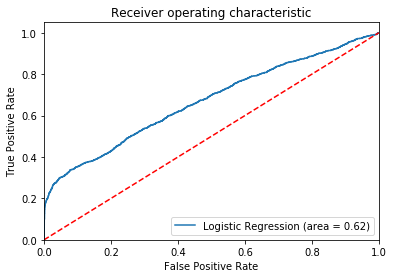

In [40]:

full_logit_roc_auc = roc_auc_score(full_y_test, full_y_pred)
full_fpr, full_tpr, full_thresholds = roc_curve(full_y_test, full_logreg.predict_proba(full_X_test)[:,1])
plt.figure()
plt.plot(full_fpr, full_tpr, label='Logistic Regression (area = %0.2f)' % full_logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Original

In [74]:
len(original.columns.values.tolist())

94

In [75]:
original.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  income  workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0  <=50K                      0                    0                       0   
1  <=50K                      0                    0                       0   
2  <=50K                      0                    0                       0   
3  <=50K                      0                    0                       0   
4  <=50K                      0                    0                       0   

   ...  native-country_Portugal  native-country_Puerto-Rico  \
0  ...                        0                           0   
1  ...                        0                           0   
2  ...                        0                           0   
3  ...                        0                           0   
4  ...                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 94 columns]

### Oversampling

In [76]:
ori_x=original.loc[:,original.columns !='income']
ori_y=original.loc[:,original.columns == 'income']
ori_y=ori_y.iloc[:,0]

In [77]:
ori_os = SMOTE(random_state=0)

ori_X_train, ori_X_test, ori_y_train, ori_y_test = train_test_split(ori_x, ori_y, test_size=0.3, random_state=0)
ori_columns = ori_X_train.columns

In [78]:
ori_os_data_X,ori_os_data_y=ori_os.fit_sample(ori_X_train, ori_y_train)

In [79]:
ori_os_data_X = pd.DataFrame(data=ori_os_data_X,columns=ori_columns )
ori_os_data_y= pd.DataFrame(data=ori_os_data_y,columns=['income'])

In [80]:

# we can Check the numbers of our data
print("length of oversampled data is ",len(ori_os_data_X))
print("Number of no subscription in oversampled data",len(ori_os_data_y[ori_os_data_y['income']=='<=50K']))
print("Number of subscription",len(ori_os_data_y[ori_os_data_y['income']=='>50K']))
print("Proportion of no subscription data in oversampled data is ",len(ori_os_data_y[ori_os_data_y['income']=='<=50K'])/len(ori_os_data_X))
print("Proportion of subscription data in oversampled data is ",len(ori_os_data_y[ori_os_data_y['income']=='>50K'])/len(ori_os_data_X))

length of oversampled data is  34626
Number of no subscription in oversampled data 17313
Number of subscription 17313
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


### RFE

#https://planspace.org/20150423-forward_selection_with_statsmodels/
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [59]:
# ori_reg=linear_model.LogisticRegression()
# ori_rfe_result=list()
# for i in range(31,50):
#     ori_rfe = RFE(ori_reg, i)
#     ori_fit = ori_rfe.fit(ori_os_data_X, ori_os_data_y.values.ravel())
#     ori_rfe_result.append(ori_rfe.support_)


# ori_feature_list=list()
# for result in rfe_result:
#     features=os_data_X.columns.values
#     result_tb = pd.DataFrame({'rfe_result': list(result), 'features': list(features)}, 
#                          columns=['rfe_result', 'features'])
#     selected=result_tb[result_tb['rfe_result']==True]
#     items=selected['features'].tolist()
#     variable=list()
#     for item in items:
#         t=re.findall(r"(.+?)_*.*",str(item))
#         variable.append(str(t))
#     mylist=list(set(variable))
#     mylist=[s.strip("['") for s in mylist]
#     mylist=[s.strip("']") for s in mylist]
#     feature_list.append(mylist)
# unique_data = [list(x) for x in set(tuple(x) for x in feature_list)] 
# print(unique_data)

# for li in unique_data:
#     pat='|'.join(li)
#     x= pd.DataFrame(os_data_X.iloc[:,os_data_X.columns.str.contains(pat)])
#     y= pd.DataFrame(os_data_y['income'])
#     y['income']=np.where(y['income']=='<=50K',0,1)
#     x=sm.add_constant(x)
#     logit_model=sm.Logit(y.astype(float),x.astype(float))
#     result=logit_model.fit()
#     print(result.bic)

[['sex', 'marital-status', 'relationship', 'education', 'race', 'workclass', 'occupation', 'native-country'], ['sex', 'marital-status', '', 'relationship', 'education', 'race', 'workclass', 'occupation', 'native-country'], ['marital-status', 'relationship', 'education', 'race', 'workclass', 'occupation', 'native-country']]
         Current function value: 0.271980
         Iterations: 35
22485.223695072094
         Current function value: 0.241131
         Iterations: 35
20094.622003371467
         Current function value: 0.272289
         Iterations: 35
22499.134614029746


In [71]:
# t=rfe_result[18]
# features=os_data_X.columns.values
# result_tb = pd.DataFrame({'rfe_result': list(t), 'features': list(features)}, 
#                          columns=['rfe_result', 'features'])
# selected=result_tb[result_tb['rfe_result']==True]
# selected

rfe_result                              features
0         True                                   age
2         True                         education-num
4         True                          capital-loss
5         True                        hours-per-week
6         True                 workclass_Federal-gov
7         True                   workclass_Local-gov
9         True                     workclass_Private
10        True                workclass_Self-emp-inc
11        True            workclass_Self-emp-not-inc
12        True                   workclass_State-gov
14        True                   education_Assoc-voc
15        True                   education_Bachelors
16        True                   education_Doctorate
17        True                     education_HS-grad
18        True                     education_Masters
19        True                 education_Not-HS-Grad
20        True                 education_Prof-school
21        True                education_Some-college
23        True     marital-status_Married-civ-spouse
24        True  marital-status_Married-spouse-absent
25        True          marital-status_Never-married
26        True              marital-status_Separated
27        True                marital-status_Widowed
28        True               occupation_Adm-clerical
30        True               occupation_Craft-repair
31        True            occupation_Exec-managerial
32        True            occupation_Farming-fishing
33        True          occupation_Handlers-cleaners
34        True          occupation_Machine-op-inspct
35        True              occupation_Other-service
36        True            occupation_Priv-house-serv
38        True            occupation_Protective-serv
39        True                      occupation_Sales
40        True               occupation_Tech-support
41        True           occupation_Transport-moving
42        True            relationship_Not-in-family
43        True           relationship_Other-relative
44        True                relationship_Own-child
45        True                relationship_Unmarried
47        True               race_Asian-Pac-Islander
48        True                            race_Black
49        True                            race_Other
50        True                            race_White
51        True                              sex_Male
57        True     native-country_Dominican-Republic
59        True            native-country_El-Salvador
77        True                 native-country_Mexico
84        True            native-country_Puerto-Rico
90        True          native-country_United-States

In [234]:
#https://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/
ori_reg=linear_model.LogisticRegression()
ori_rfe = RFE(ori_reg, n_features_to_select=1)
ori_rfe.fit(ori_os_data_X, ori_os_data_y.values.ravel())
ori_rank=ori_rfe.ranking_
ori_features=ori_os_data_X.columns.values
ori_result_tb = pd.DataFrame({'rfe_result': list(ori_rank), 'features': list(ori_features)}, 
                          columns=['rfe_result', 'features'])


In [235]:
ori_result_tb.sort_values(by=['rfe_result']).head(50)

rfe_result                           features
44           1             relationship_Own-child
43           2        relationship_Other-relative
45           3             relationship_Unmarried
42           4         relationship_Not-in-family
19           5              education_Not-HS-Grad
17           6                  education_HS-grad
14           7                education_Assoc-voc
21           8             education_Some-college
55           9            native-country_Columbia
35          10           occupation_Other-service
33          11       occupation_Handlers-cleaners
32          12         occupation_Farming-fishing
36          13         occupation_Priv-house-serv
34          14       occupation_Machine-op-inspct
28          15            occupation_Adm-clerical
41          16        occupation_Transport-moving
30          17            occupation_Craft-repair
39          18                   occupation_Sales
38          19         occupation_Protective-serv
40          20            occupation_Tech-support
37          21          occupation_Prof-specialty
31          22         occupation_Exec-managerial
84          23         native-country_Puerto-Rico
54          24               native-country_China
15          25                education_Bachelors
57          26  native-country_Dominican-Republic
91          27             native-country_Vietnam
77          28              native-country_Mexico
18          29                  education_Masters
52          30            native-country_Cambodia
25          31       marital-status_Never-married
49          32                         race_Other
48          33                         race_Black
47          34            race_Asian-Pac-Islander
50          35                         race_White
29          36            occupation_Armed-Forces
74          37             native-country_Jamaica
83          38            native-country_Portugal
13          39              workclass_Without-pay
65          40               native-country_Haiti
12          41                workclass_State-gov
61          42              native-country_France
59          43         native-country_El-Salvador
63          44              native-country_Greece
80          45                native-country_Peru
6           46              workclass_Federal-gov
58          47             native-country_Ecuador
64          48           native-country_Guatemala
70          49               native-country_India
27          50             marital-status_Widowed

In [83]:
ori_features=[ 'relationship', 'education_', 'race', 'occupation','workclass', 'hours-per-week']

ori_pat='|'.join(ori_features)
ori_x= pd.DataFrame(ori_os_data_X.iloc[:,ori_os_data_X.columns.str.contains(ori_pat)])
ori_y= pd.DataFrame(ori_os_data_y['income'])
                
ori_y['income']=np.where(ori_y['income']=='<=50K',0,1)
ori_x=sm.add_constant(ori_x)

In [95]:
ori_logit_model=sm.Logit(ori_y.astype(float),ori_x.astype(float))
ori_result=ori_logit_model.fit(maxiter=2000)
ori_result.summary2()

         Current function value: 0.273077
         Iterations: 2000


C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
=========================================================================================
Model:                      Logit                    Pseudo R-squared:         0.606     
Dependent Variable:         income                   AIC:                      18993.1037
Date:                       2020-01-16 15:26         BIC:                      19339.6504
No. Observations:           34626                    Log-Likelihood:           -9455.6   
Df Model:                   40                       LL-Null:                  -24001.   
Df Residuals:               34585                    LLR p-value:              0.0000    
Converged:                  0.0000                   Scale:                    1.0000    
No. Iterations:             2000.0000                                                    
-----------------------------------------------------------------------------------------
                              Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
-----------------------------------------------------------------------------------------
const                          3.5281     0.1526  23.1264 0.0000       3.2291      3.8271
hours-per-week                 0.0360     0.0018  20.4525 0.0000       0.0325      0.0394
workclass_Federal-gov          0.6728     0.1328   5.0675 0.0000       0.4126      0.9330
workclass_Local-gov           -0.0795     0.1117  -0.7125 0.4762      -0.2984      0.1393
workclass_Never-worked       -24.0492 95866.7685  -0.0003 0.9998 -187919.4628 187871.3645
workclass_Private              0.1894     0.0802   2.3625 0.0182       0.0323      0.3466
workclass_Self-emp-inc         0.3600     0.1248   2.8852 0.0039       0.1155      0.6046
workclass_Self-emp-not-inc    -0.2520     0.1046  -2.4085 0.0160      -0.4571     -0.0469
workclass_State-gov           -0.4845     0.1314  -3.6867 0.0002      -0.7421     -0.2269
workclass_Without-pay        -22.8799 90590.3226  -0.0003 0.9998 -177576.6496 177530.8897
education_Assoc-voc           -2.3595     0.1062 -22.2103 0.0000      -2.5677     -2.1512
education_Bachelors           -1.4852     0.0740 -20.0701 0.0000      -1.6303     -1.3402
education_Doctorate           -0.2267     0.1905  -1.1901 0.2340      -0.6000      0.1466
education_HS-grad             -2.6955     0.0711 -37.9164 0.0000      -2.8348     -2.5561
education_Masters             -1.0613     0.0975 -10.8800 0.0000      -1.2525     -0.8701
education_Not-HS-Grad         -3.8523     0.1053 -36.5665 0.0000      -4.0588     -3.6458
education_Prof-school         -0.6333     0.1512  -4.1889 0.0000      -0.9297     -0.3370
education_Some-college        -2.3909     0.0741 -32.2516 0.0000      -2.5362     -2.2456
occupation_Adm-clerical       -2.2985     0.1036 -22.1943 0.0000      -2.5015     -2.0955
occupation_Armed-Forces       -3.0473     1.3485  -2.2598 0.0238      -5.6904     -0.4043
occupation_Craft-repair       -2.2314     0.0905 -24.6495 0.0000      -2.4088     -2.0539
occupation_Exec-managerial    -1.3473     0.0877 -15.3703 0.0000      -1.5191     -1.1755
occupation_Farming-fishing    -3.1579     0.1538 -20.5316 0.0000      -3.4593     -2.8564
occupation_Handlers-cleaners  -3.2248     0.1712 -18.8321 0.0000      -3.5605     -2.8892
occupation_Machine-op-inspct  -2.7219     0.1176 -23.1417 0.0000      -2.9524     -2.4913
occupation_Other-service      -3.3117     0.1432 -23.1196 0.0000      -3.5924     -3.0309
occupation_Priv-house-serv    -3.7642     1.0406  -3.6175 0.0003      -5.8037     -1.7248
occupation_Prof-specialty     -1.5896     0.0911 -17.4413 0.0000      -1.7683     -1.4110
occupation_Protective-serv    -1.7629     0.1488 -11.8459 0.0000      -2.0546     -1.4712
occupation_Sales              -1.9983     0.0943 -21.1849 0.0000      -2.1831     -1.8134
occupation_Tech-support       -1.7361     0.1310 -13.2533 0.0000      -1.9928     -1.4793
occupation_Transport-moving  

In [50]:
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
ori_logreg = LogisticRegression()
ori_logreg.fit(ori_x, ori_y)

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Result

In [51]:

ori_X_test=pd.DataFrame(ori_X_test.iloc[:,ori_X_test.columns.str.contains(ori_pat)])
ori_X_test=sm.add_constant(ori_X_test)
ori_y_test=pd.DataFrame(data=ori_y_test,columns=['income'])
ori_y_test['income']=np.where(ori_y_test['income']=='<=50K',0,1)
ori_y_pred = ori_logreg.predict(ori_X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(ori_logreg.score(ori_X_test, ori_y_test)))

Accuracy of logistic regression classifier on test set: 0.83


C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:

ori_cmx = confusion_matrix(ori_y_test, ori_y_pred)
ori_cmx

array([[6427,  980],
       [ 729, 1633]], dtype=int64)

In [53]:
print(classification_report(ori_y_test, ori_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7407
           1       0.62      0.69      0.66      2362

    accuracy                           0.83      9769
   macro avg       0.76      0.78      0.77      9769
weighted avg       0.83      0.83      0.83      9769



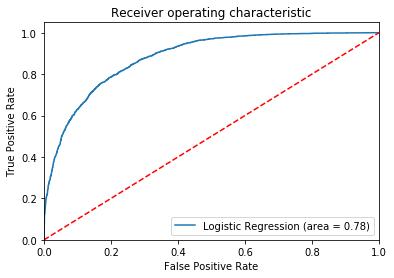

In [54]:

ori_logit_roc_auc = roc_auc_score(ori_y_test, ori_logreg.predict(ori_X_test))
ori_fpr, ori_tpr, ori_thresholds = roc_curve(ori_y_test, ori_logreg.predict_proba(ori_X_test)[:,1])
plt.figure()
plt.plot(ori_fpr, ori_tpr, label='Logistic Regression (area = %0.2f)' % ori_logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [130]:
# classi=pred_y
# prob1=probs_y[:,0]
# prob2=probs_y[:,1]
# maxprob=[li.max() for li in probs_y]
# sns.scatterplot( prob1,classi, hue=y_test)

In [131]:

# pred_y=logreg.predict(X_test) 

# probs_y=logreg.predict_proba(X_test) 
#   # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

# from sklearn.metrics import precision_recall_curve
# precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
# 1]) 
#    #retrieve probability of being 1(in second column of probs_y)
# pr_auc = metrics.auc(recall, precision)

# plt.title("Precision-Recall vs Threshold Chart")
# plt.plot(thresholds, precision[: -1], "b--", label="Precision")
# plt.plot(thresholds, recall[: -1], "r--", label="Recall")
# plt.ylabel("Precision, Recall")
# plt.xlabel("Threshold")
# plt.legend(loc="lower left")
# plt.ylim([0,1])

## Attempt1

In [311]:
attempt1.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

  income  workclass_gov  workclass_noincome  workclass_self  ...  \
0  <=50K              1                   0               0  ...   
1  <=50K              0                   0               1  ...   
2  <=50K              0                   0               0  ...   
3  <=50K              0                   0               0  ...   
4  <=50K              0                   0               0  ...   

   occupation_Sales  occupation_Tech-support  occupation_Transport-moving  \
0                 0                        0                            0   
1                 0                        0                            0   
2                 0                        0                            0   
3                 0                        0                            0   
4                 0                        0                            0   

   relationship_Not-in-family  relationship_Other-relative  \
0                           1                            0   
1                           0                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   relationship_Own-child  relationship_Unmarried  race_White  sex_Male  \
0                       0                       0           1         1   
1                       0                       0           1         1   
2                       0                       0           1         1   
3                       0                       0           0         1   
4                       0                       0           0         0   

   native-country_United-States  
0                             1  
1                             1  
2                             1  
3                             1  
4                             0  

[5 rows x 40 columns]

### Oversampling

In [320]:
att_x=attempt1.loc[:,attempt1.columns !='income']
att_y=attempt1.loc[:,attempt1.columns == 'income']
att_y=att_y.iloc[:,0]
att_os = SMOTE(random_state=0)

att_X_train, att_X_test, att_y_train, att_y_test = train_test_split(att_x, att_y, test_size=0.3, random_state=0)
att_columns = att_X_train.columns

att_os_data_X,att_os_data_y=att_os.fit_sample(att_X_train, att_y_train)
att_os_data_X = pd.DataFrame(data=att_os_data_X,columns=att_columns )
att_os_data_y= pd.DataFrame(data=att_os_data_y,columns=['income'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(att_os_data_X))
print("Number of no subscription in oversampled data",len(att_os_data_y[att_os_data_y['income']=='<=50K']))
print("Number of subscription",len(att_os_data_y[att_os_data_y['income']=='>50K']))
print("Proportion of no subscription data in oversampled data is ",len(att_os_data_y[att_os_data_y['income']=='<=50K'])/len(att_os_data_X))
print("Proportion of subscription data in oversampled data is ",len(att_os_data_y[att_os_data_y['income']=='>50K'])/len(att_os_data_X))

length of oversampled data is  34626
Number of no subscription in oversampled data 17313
Number of subscription 17313
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


### RFE

In [215]:
# att_reg=linear_model.LogisticRegression()
# att_rfe_result=list()
# for i in range(10,43):
#     att_rfe = RFE(att_reg, i)
#     att_fit = att_rfe.fit(att_os_data_X, att_os_data_y.values.ravel())
#     att_rfe_result.append(att_rfe.support_)


# feature_list=list()
# for result in rfe_result:
#     features=os_data_X.columns.values
#     result_tb = pd.DataFrame({'rfe_result': list(result), 'features': list(features)}, 
#                          columns=['rfe_result', 'features'])
#     selected=result_tb[result_tb['rfe_result']==True]
#     items=selected['features'].tolist()
#     variable=list()
#     for item in items:
#         t=re.findall(r"(.+?)_.*",str(item))
#         variable.append(str(t))
#     mylist=list(set(variable))
#     mylist=[s.strip("['") for s in mylist]
#     mylist=[s.strip("']") for s in mylist]
#     feature_list.append(mylist)
# unique_data = [list(x) for x in set(tuple(x) for x in feature_list)] 
# print(unique_data)

# for li in unique_data:
#     pat='|'.join(li)
#     x= pd.DataFrame(os_data_X.iloc[:,os_data_X.columns.str.contains(pat)])
#     y= pd.DataFrame(os_data_y['income'])
#     y['income']=np.where(y['income']=='<=50K',0,1)
#     x=sm.add_constant(x)
#     logit_model=sm.Logit(y.astype(float),x.astype(float))
#     result=logit_model.fit()
#     print(result.bic)

In [328]:
#https://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/
att_reg=linear_model.LogisticRegression(max_iter=500)
att_rfe = RFE(att_reg, n_features_to_select=1)
att_rfe.fit(att_os_data_X, att_os_data_y.values.ravel())

att_rank=att_rfe.ranking_
att_features=att_os_data_X.columns.values
att_result_tb = pd.DataFrame({'rfe_result': list(att_rank), 'features': list(att_features)}, 
                          columns=['rfe_result', 'features'])

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [329]:
att_result_tb.sort_values(by=['rfe_result']).head(50)

rfe_result                      features
34           1        relationship_Own-child
33           2   relationship_Other-relative
35           3        relationship_Unmarried
32           4    relationship_Not-in-family
14           5         education_Not-HS-Grad
12           6             education_HS-grad
9            7           education_Assoc-voc
16           8        education_Some-college
17           9        marital-status_Married
24          10      occupation_Other-service
10          11           education_Bachelors
7           12            workclass_noincome
22          13  occupation_Handlers-cleaners
13          14             education_Masters
21          15    occupation_Farming-fishing
26          16    occupation_Priv-house-serv
18          17  marital-status_Never-married
23          18  occupation_Machine-op-inspct
31          19   occupation_Transport-moving
19          20       occupation_Craft-repair
28          21    occupation_Protective-serv
29          22              occupation_Sales
30          23       occupation_Tech-support
27          24     occupation_Prof-specialty
25          25             occupation_Others
20          26    occupation_Exec-managerial
6           27                 workclass_gov
15          28         education_Prof-school
37          29                      sex_Male
8           30                workclass_self
38          31  native-country_United-States
11          32           education_Doctorate
5           33                hours-per-week
36          34                    race_White
0           35                           age
2           36                 education-num
4           37                  capital-loss
3           38                  capital-gain
1           39                        fnlwgt

In [285]:
rlasso = linear_model.Lasso(alpha=0.5,normalize=True,max_iter=1000)
att_os_data_y['income']=np.where(att_os_data_y['income']=='<=50K',0,1)
rlasso.fit(att_os_data_X, att_os_data_y.values.ravel())
att_features=att_os_data_X.columns.values
pd.DataFrame({'rfe_result': list(rlasso.coef_), 'features': list(att_features)},columns=['rfe_result', 'features'])

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)


rfe_result                      features
0          0.0                           age
1          0.0                        fnlwgt
2          0.0                 education-num
3          0.0                  capital-gain
4          0.0                  capital-loss
5          0.0                hours-per-week
6          0.0                 workclass_gov
7          0.0            workclass_noincome
8          0.0                workclass_self
9          0.0           education_Assoc-voc
10         0.0           education_Bachelors
11         0.0           education_Doctorate
12         0.0             education_HS-grad
13         0.0             education_Masters
14         0.0         education_Not-HS-Grad
15         0.0         education_Prof-school
16         0.0        education_Some-college
17         0.0        marital-status_Married
18         0.0  marital-status_Never-married
19         0.0       occupation_Adm-clerical
20         0.0       occupation_Armed-Forces
21         0.0       occupation_Craft-repair
22         0.0    occupation_Exec-managerial
23         0.0    occupation_Farming-fishing
24         0.0  occupation_Handlers-cleaners
25         0.0  occupation_Machine-op-inspct
26         0.0      occupation_Other-service
27         0.0    occupation_Priv-house-serv
28         0.0     occupation_Prof-specialty
29         0.0    occupation_Protective-serv
30         0.0              occupation_Sales
31         0.0       occupation_Tech-support
32         0.0   occupation_Transport-moving
33         0.0    relationship_Not-in-family
34         0.0   relationship_Other-relative
35         0.0        relationship_Own-child
36         0.0        relationship_Unmarried
37         0.0                    race_White
38         0.0                      sex_Male
39         0.0  native-country_United-States

In [321]:
att_features=['marital-status','sex','hours-per-week','age','capital','relationship', 'education_', 'occupation','hours-per-week']

att_pat='|'.join(att_features)
att_x= pd.DataFrame(att_os_data_X.iloc[:,att_os_data_X.columns.str.contains(att_pat)])
att_y= pd.DataFrame(att_os_data_y['income'])

att_y['income']=np.where(att_y['income']=='<=50K',0,1)
att_x=sm.add_constant(att_x)



C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [322]:
att_logit_model=sm.Logit(att_y.astype(float),att_x.astype(float))
att_result=att_logit_model.fit(maxiter=500)
att_result.summary2()

Optimization terminated successfully.
         Current function value: 0.250187
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.639     
Dependent Variable:     income               AIC:                  17391.9606
Date:                   2020-01-16 19:04     BIC:                  17670.8885
No. Observations:       34626                Log-Likelihood:       -8663.0   
Df Model:               32                   LL-Null:              -24001.   
Df Residuals:           34593                LLR p-value:          0.0000    
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         10.0000                                              
-----------------------------------------------------------------------------
                              Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
const                         2.4046   0.2000  12.0222 0.0000  2.0126  2.7966
age                           0.0237   0.0018  12.9381 0.0000  0.0201  0.0272
capital-gain                  0.0003   0.0000  26.4977 0.0000  0.0003  0.0003
capital-loss                  0.0006   0.0000  14.3660 0.0000  0.0005  0.0007
hours-per-week                0.0350   0.0019  18.6258 0.0000  0.0313  0.0387
education_Assoc-voc          -2.4849   0.1109 -22.4156 0.0000 -2.7021 -2.2676
education_Bachelors          -1.5908   0.0764 -20.8328 0.0000 -1.7405 -1.4411
education_Doctorate          -0.5138   0.2094  -2.4538 0.0141 -0.9242 -0.1034
education_HS-grad            -2.8213   0.0719 -39.2143 0.0000 -2.9623 -2.6803
education_Masters            -1.2749   0.1028 -12.4076 0.0000 -1.4763 -1.0735
education_Not-HS-Grad        -3.8844   0.1104 -35.1910 0.0000 -4.1007 -3.6681
education_Prof-school        -0.9932   0.1681  -5.9092 0.0000 -1.3226 -0.6638
education_Some-college       -2.5352   0.0750 -33.7818 0.0000 -2.6823 -2.3881
marital-status_Married       -1.4573   0.1576  -9.2491 0.0000 -1.7661 -1.1485
marital-status_Never-married -0.7628   0.0945  -8.0757 0.0000 -0.9479 -0.5777
occupation_Craft-repair      -1.7608   0.0714 -24.6695 0.0000 -1.9007 -1.6209
occupation_Exec-managerial   -0.9442   0.0680 -13.8878 0.0000 -1.0774 -0.8109
occupation_Farming-fishing   -3.1047   0.1480 -20.9772 0.0000 -3.3948 -2.8146
occupation_Handlers-cleaners -2.6424   0.1681 -15.7156 0.0000 -2.9720 -2.3129
occupation_Machine-op-inspct -2.1348   0.1048 -20.3711 0.0000 -2.3402 -1.9294
occupation_Other-service     -2.7781   0.1346 -20.6461 0.0000 -3.0418 -2.5144
occupation_Others            -2.5322   0.1302 -19.4442 0.0000 -2.7874 -2.2770
occupation_Priv-house-serv   -4.7991   2.0064  -2.3919 0.0168 -8.7315 -0.8666
occupation_Prof-specialty    -1.1513   0.0748 -15.3968 0.0000 -1.2979 -1.0048
occupation_Protective-serv   -1.4347   0.1332 -10.7686 0.0000 -1.6959 -1.1736
occupation_Sales             -1.5293   0.0762 -20.0803 0.0000 -1.6786 -1.3801
occupation_Tech-support      -1.0603   0.1215  -8.7285 0.0000 -1.2984 -0.8222
occupation_Transport-moving  -1.9711   0.1010 -19.5241 0.0000 -2.1689 -1.7732
relationship_Not-in-family   -3.8510   0.1657 -23.2432 0.0000 -4.1757 -3.5262
relationship_Other-relative  -3.9172   0.2703 -14.4910 0.0000 -4.4470 -3.3873
relationship_Own-child       -4.9323   0.2291 -21.5277 0.0000 -5.3813 -4.4832
relationship_Unmarried       -4.5423   0.1843 -24.6481 0.0000 -4.9035 -4.1811
sex_Male                      0.2288   0.0554   4.1295 0.0000  0.1202  0.3374
=============================================================================

"""

In [323]:
att_logreg = LogisticRegression(max_iter=1000)
att_logreg.fit(att_x, att_y)

C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [324]:
att_X_test=pd.DataFrame(att_X_test.iloc[:,att_X_test.columns.str.contains(att_pat)])
att_X_test=sm.add_constant(att_X_test)
att_y_test=pd.DataFrame(data=att_y_test,columns=['income'])
att_y_test['income']=np.where(att_y_test['income']=='<=50K',0,1)
att_y_pred = att_logreg.predict(att_X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(att_logreg.score(att_X_test, att_y_test)))

Accuracy of logistic regression classifier on test set: 0.84


C:\Users\xingxuan_dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [325]:
att_cmx = confusion_matrix(att_y_test, att_y_pred)
att_cmx

array([[6581,  826],
       [ 773, 1589]], dtype=int64)

In [326]:
print(classification_report(att_y_test, att_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7407
           1       0.66      0.67      0.67      2362

    accuracy                           0.84      9769
   macro avg       0.78      0.78      0.78      9769
weighted avg       0.84      0.84      0.84      9769



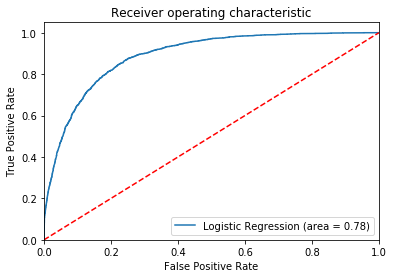

In [327]:
att_logit_roc_auc = roc_auc_score(att_y_test, att_logreg.predict(att_X_test))
att_fpr, att_tpr,att_thresholds = roc_curve(att_y_test, att_logreg.predict_proba(att_X_test)[:,1])
plt.figure()
plt.plot(att_fpr, att_tpr, label='Logistic Regression (area = %0.2f)' % att_logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [282]:
from sklearn.metrics import r2_score
r2_score(ori_y_test,ori_y_pred)

0.04573293656468669

# Fit a regression model to predict whether income of an individual is more than 50k. What regression model do you use? Why? How well is your model performing?

https://towardsdatascience.com/a-deep-dive-into-imbalanced-data-over-sampling-f1167ed74b5

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

# Use the income dataset to regress work hours on the rest of the data. Compare the R^2 with R^2 of another model that you fit with only the significant variables. Explore some interaction terms and explain why they were of interest.

In [332]:
df5=income.copy()
df5.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [333]:
factors_df5 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
#Checking for nulls
df5.isnull().values.any()
#in case nulls need to be handled
for factor in factors_df5:
    df5[factor].fillna(value=df5[factor].mode()[0], inplace=True)
df5['occupation']=np.where(df5['occupation'] =='Armed-Forces', 'Others', df5['occupation'])
df5['occupation']=np.where(df5['occupation'] =='?', 'Others', df5['occupation'])

#merging levels of education
df5['education']=np.where(df5['education'] =='11th', 'Not-HS-Grad', df5['education'])
df5['education']=np.where(df5['education'] =='9th', 'Not-HS-Grad', df5['education'])
df5['education']=np.where(df5['education'] =='7th-8th', 'Not-HS-Grad', df5['education'])
df5['education']=np.where(df5['education'] =='5th-6th', 'Not-HS-Grad', df5['education'])
df5['education']=np.where(df5['education'] =='10th', 'Not-HS-Grad', df5['education'])
df5['education']=np.where(df5['education'] =='1st-4th', 'Not-HS-Grad', df5['education'])
df5['education']=np.where(df5['education'] =='Preschool', 'Not-HS-Grad', df5['education'])
df5['education']=np.where(df5['education'] =='12th', 'Not-HS-Grad', df5['education'])

#merging levels of marital-status
df5['marital-status']=np.where(df5['marital-status'] =='Married-spouse-absent', 'Married', df5['marital-status'])
df5['marital-status']=np.where(df5['marital-status'] =='Married-AF-spouse', 'Married', df5['marital-status'])
df5['marital-status']=np.where(df5['marital-status'] =='Married-civ-spouse', 'Married', df5['marital-status'])
df5['marital-status']=np.where(df5['marital-status'] =='Divorced', 'GoneMarried', df5['marital-status'])
df5['marital-status']=np.where(df5['marital-status'] =='Separated', 'GoneMarried', df5['marital-status'])
df5['marital-status']=np.where(df5['marital-status'] =='Widowed', 'GoneMarried', df5['marital-status'])

df5['race']=np.where(df5['race'] =='Black', 'Others', df5['race'])
df5['race']=np.where(df5['race'] =='Asian-Pac-Islander', 'Others', df5['race'])
df5['race']=np.where(df5['race'] =='Amer-Indian-Eskimo', 'Others', df5['race'])
df5['race']=np.where(df5['race'] =='Other', 'Others', df5['race'])

df5['workclass']=np.where(df5['workclass'] =='Without-pay', 'noincome', df5['workclass'])
df5['workclass']=np.where(df5['workclass'] =='Never-worked', 'noincome', df5['workclass'])
df5['workclass']=np.where(df5['workclass'] =='?', 'noincome', df5['workclass'])
df5['workclass']=np.where(df5['workclass'] =='State-gov', 'gov', df5['workclass'])
df5['workclass']=np.where(df5['workclass'] =='Local-gov', 'gov', df5['workclass'])
df5['workclass']=np.where(df5['workclass'] =='Federal-gov', 'gov', df5['workclass'])
df5['workclass']=np.where(df5['workclass'] =='Self-emp-not-inc', 'self', df5['workclass'])
df5['workclass']=np.where(df5['workclass'] =='Self-emp-inc', 'self', df5['workclass'])

#merging levels of country
df5['native-country']=np.where(df5['native-country'] !='United-States', 'Others', df5['native-country'])

df5['relationship']=np.where(df5['relationship'] =='Husband', 'Couple', df5['relationship'])
df5['relationship']=np.where(df5['relationship'] =='Wife', 'Couple', df5['relationship'])

#assigning levels to the values of categorical variables
df5_fact = df5.copy()
mapping_levels_df5 = []
for factor in factors_df5:
    df5_fact[factor] = df5_fact[factor].factorize(sort = True)[0]
    mapping_levels_df5.append(df5_fact[factor].factorize(sort = True)[1])
df5_fact.head()

for var in factors_df5:
    df5_cat_list='var'+'_'+var
    df5_cat_list = pd.get_dummies(df5[var], prefix=var,drop_first=True)
    df5 = pd.concat([df5,df5_cat_list], axis = 1)
    df5 = df5.drop(var, 1)
df5.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_gov  workclass_noincome  workclass_self  education_Assoc-voc  \
0              1                   0               0                    0   
1              0                   0               1                    0   
2              0                   0               0                    0   
3              0                   0               0                    0   
4              0                   0               0                    0   

   ...  occupation_Tech-support  occupation_Transport-moving  \
0  ...                        0                            0   
1  ...                        0                            0   
2  ...                        0                            0   
3  ...                        0                            0   
4  ...                        0                            0   

   relationship_Not-in-family  relationship_Other-relative  \
0                           1                            0   
1                           0                            0   
2                           1                            0   
3                           0                            0   
4                           0                            0   

   relationship_Own-child  relationship_Unmarried  race_White  sex_Male  \
0                       0                       0           1         1   
1                       0                       0           1         1   
2                       0                       0           1         1   
3                       0                       0           0         1   
4                       0                       0           0         0   

   native-country_United-States  income_>50K  
0                             1            0  
1                             1            0  
2                             1            0  
3                             1            0  
4                             0            0  

[5 rows x 40 columns]

In [334]:
df5_x=df5.loc[:,df5.columns !='hours-per-week']
df5_y=df5.loc[:,df5.columns == 'hours-per-week']
df5_y=df5_y.iloc[:,0]
#df5_os = SMOTE(random_state=0)

df5_X_train, df5_X_test, df5_y_train, df5_y_test = train_test_split(df5_x, df5_y, test_size=0.3, random_state=0)
df5_columns = df5_X_train.columns

# df5_os_data_X,df5_os_data_y=df5_os.fit_sample(df5_X_train, df5_y_train)
# df5_os_data_X = pd.DataFrame(data=df5_os_data_X,columns=df5_columns )
# df5_os_data_y= pd.DataFrame(data=df5_os_data_y,columns=['Hours-per-week'])

# # we can Check the numbers of our data
# print("length of oversampled data is ",len(df5_os_data_X))
# print("Number of no subscription in oversampled data",len(df5_os_data_y[df5_os_data_y['income']=='<=50K']))
# print("Number of subscription",len(df5_os_data_y[df5_os_data_y['income']=='>50K']))
# print("Proportion of no subscription data in oversampled data is ",len(df5_os_data_y[df5_os_data_y['income']=='<=50K'])/len(df5_os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(att_os_data_y[att_os_data_y['income']=='>50K'])/len(att_os_data_X))

## Full Linear Regression - Transformed

In [336]:
df5_X_train = sm.add_constant(df5_X_train)
df5_lm=sm.OLS(df5_y_train,df5_X_train)
df5_result=df5_lm.fit()
df5_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours-per-week   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     137.3
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:38:02   Log-Likelihood:                -87109.
No. Observations:               22792   AIC:                         1.743e+05
Df Residuals:                   22752   BIC:                         1.746e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           50.9368      1.730     29.445      0.000      47.546      54.327
age                             -0.1130      0.007    -16.559      0.000      -0.126      -0.100
fnlwgt                       -2.174e-06   7.03e-07     -3.091      0.002   -3.55e-06   -7.96e-07
education-num                   -0.6724      0.123     -5.447      0.000      -0.914      -0.430
capital-gain                  3.563e-05   1.02e-05      3.499      0.000    1.57e-05    5.56e-05
capital-loss                     0.0002      0.000      0.943      0.346      -0.000       0.001
workclass_gov                   -0.4954      0.237     -2.088      0.037      -0.960      -0.030
workclass_noincome              -9.1749      2.550     -3.598      0.000     -14.172      -4.177
workclass_self                   2.5789      0.254     10.157      0.000       2.081       3.077
education_Assoc-voc             -0.0116      0.559     -0.021      0.983      -1.107       1.084
education_Bachelors              1.1293      0.476      2.375      0.018       0.197       2.061
education_Doctorate              6.6889      0.973      6.876      0.000       4.782       8.596
education_HS-grad               -1.9590      0.573     -3.419      0.001      -3.082      -0.836
education_Masters                2.6700      0.594      4.494      0.000       1.506       3.834
education_Not-HS-Grad           -6.7506      0.913     -7.393      0.000      -8.540      -4.961
education_Prof-school            5.3900      0.814      6.623      0.000       3.795       6.985
education_Some-college          -2.1404      0.510     -4.195      0.000      -3.141      -1.140
marital-status_Married          -0.5300      0.564     -0.940      0.347      -1.635       0.575
marital-status_Never-married    -2.4146      0.255     -9.461      0.000      -2.915      -1.914
occupation_Craft-repair          1.3379      0.323      4.137      0.000       0.704       1.972
occupation_Exec-managerial       3.4581      0.318     10.858      0.000       2.834       4.082
occupation_Farming-fishing       6.4859      0.497     13.059      0.000       5.512       7.459
occupation_Handlers-cleaners    -0.6155      0.439     -1.403      0.161      -1.475       0.244
occupation_Machine-op-inspct     1.5382      0.381      4.034      0.000       0.791       2.286
occupation_Other-service        -2.3750      0.323     -7.361      0.000      -3.007      -1.743
occupation_Others                4.3103      2.558      1.685      0.092      -0.704       9.325
occupation_Priv-house-serv      -4.8007      1.189     -4.037      0.000      -7.132      -2.470
occupation_Prof-specialty        0.6060      0.336      1.802      0.072      -0.053       1.265
occupation_Protective-serv       2.3764      0.577      4.122      0.000    

In [353]:
df5_reg=linear_model.LinearRegression()
df5_rfe = RFE(df5_reg, n_features_to_select=1)
y = df5_fact[['hours-per-week']]
X = df5_fact.loc[:, income_fact.columns != 'hours-per-week']
df5_rfe.fit(X, y.values.ravel())
df5_rank=df5_rfe.ranking_
df5_features=X.columns.values
df5_result_tb = pd.DataFrame({'rfe_result': list(df5_rank), 'features': list(df5_features)}, 
                          columns=['rfe_result', 'features'])

In [354]:
df5_result_tb.sort_values('rfe_result').head(50)

rfe_result        features
13           1          income
9            2             sex
5            3  marital-status
7            4    relationship
12           5  native-country
4            6   education-num
1            7       workclass
3            8       education
0            9             age
6           10      occupation
8           11            race
11          12    capital-loss
10          13    capital-gain
2           14          fnlwgt

In [342]:
# df5_reg=linear_model.LogisticRegression()
# df5_rfe_result=list()
# for i in range(15,39):
#     df5_rfe = RFE(df5_reg, i)
#     df5_fit = df5_rfe.fit(df5_X_train, df5_y_train.values.ravel())
#     df5_rfe_result.append(df5_rfe.support_)


# df5_feature_list=list()
# for result in df5_rfe_result:
#     df5_features=df5_X_train.columns.values
#     df5_result_tb = pd.DataFrame({'rfe_result': list(result), 'features': list(df5_features)}, 
#                          columns=['rfe_result', 'features'])
#     selected=df5_result_tb[df5_result_tb['rfe_result']==True]
#     items=selected['features'].tolist()
#     variable=list()
#     for item in items:
#         t=re.findall(r"(.+?)_.*",str(item))
#         variable.append(str(t))
#     mylist=list(set(variable))
#     mylist=[s.strip("['") for s in mylist]
#     mylist=[s.strip("']") for s in mylist]
#     df5_feature_list.append(mylist)
# df5_unique_data = [list(x) for x in set(tuple(x) for x in df5_feature_list)] 
# print(df5_unique_data)

# for li in df5_unique_data:
#     pat='|'.join(li)
#     x= pd.DataFrame(df5_X_train.iloc[:,df5_X_train.columns.str.contains(pat)])
#     y= pd.DataFrame(df5_y_train['hours-per-week'])
    
#     x=sm.add_constant(x)
#     df5_lm_model=sm.OLS(y,x)
#     result=df5_lm_model.fit()
#     print(result.bic)

In [357]:

df5_features=['marital-status','sex','income','relationship','education-',  'occupation','workclass']

df5_pat='|'.join(df5_features)
df5_X_train_se= pd.DataFrame(df5_X_train.iloc[:,df5_X_train.columns.str.contains(df5_pat)])
df5_X_train_se = sm.add_constant(df5_X_train_se)
df5_lm2=sm.OLS(df5_y_train,df5_X_train_se)
df5_result2=df5_lm2.fit()
df5_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours-per-week   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     194.5
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:24:31   Log-Likelihood:                -87312.
No. Observations:               22792   AIC:                         1.747e+05
Df Residuals:                   22766   BIC:                         1.749e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           32.7463      0.717     45.665      0.000      31.341      34.152
education-num                    0.3665      0.036     10.255      0.000       0.296       0.437
workclass_gov                   -0.7926      0.237     -3.344      0.001      -1.257      -0.328
workclass_noincome             -10.0534      2.570     -3.911      0.000     -15.091      -5.016
workclass_self                   2.2140      0.252      8.772      0.000       1.719       2.709
marital-status_Married           0.2909      0.564      0.516      0.606      -0.814       1.395
marital-status_Never-married    -0.9685      0.239     -4.051      0.000      -1.437      -0.500
occupation_Craft-repair          1.5467      0.325      4.761      0.000       0.910       2.183
occupation_Exec-managerial       3.3248      0.317     10.480      0.000       2.703       3.947
occupation_Farming-fishing       6.5780      0.499     13.174      0.000       5.599       7.557
occupation_Handlers-cleaners    -0.3322      0.441     -0.754      0.451      -1.196       0.532
occupation_Machine-op-inspct     1.8508      0.383      4.834      0.000       1.100       2.601
occupation_Other-service        -2.2843      0.324     -7.057      0.000      -2.919      -1.650
occupation_Others                4.5756      2.579      1.774      0.076      -0.480       9.631
occupation_Priv-house-serv      -4.6807      1.196     -3.914      0.000      -7.025      -2.337
occupation_Prof-specialty        0.8595      0.323      2.664      0.008       0.227       1.492
occupation_Protective-serv       2.5189      0.581      4.336      0.000       1.380       3.658
occupation_Sales                 1.1868      0.320      3.713      0.000       0.560       1.813
occupation_Tech-support         -0.5357      0.491     -1.091      0.275      -1.498       0.426
occupation_Transport-moving      4.7349      0.418     11.314      0.000       3.915       5.555
relationship_Not-in-family       1.5559      0.566      2.751      0.006       0.447       2.665
relationship_Other-relative     -0.4323      0.642     -0.674      0.501      -1.690       0.825
relationship_Own-child          -3.9655      0.585     -6.781      0.000      -5.112      -2.819
relationship_Unmarried           1.5620      0.599      2.607      0.009       0.387       2.737
sex_Male                         3.8174      0.194     19.671      0.000       3.437       4.198
income_>50K                      2.9765      0.210     14.182      0.000       2.565       3.388
==============================================================================
Omnibus:                     2402.778   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13173.493
Skew:                           0

In [346]:
import statsmodels.formula.api as smf

In [386]:
#clean the variable name 
# income['marital_status'] = income['marital-status']
# income['education_num'] = income['education-num']
# income['capital_gain'] = income['capital-gain']
# income['capital_loss'] = income['capital-loss']
# income['hours_per_week'] = income['hours-per-week']
# income['native_country'] = income['native-country']
# unclean_names = ['marital-status', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
# income = income.drop(unclean_names, 1)
df5_inter=income.copy()

formula1="hours_per_week~sex+occupation+income+education_num+marital_status+workclass+relationship+occupation*income"
model_inter = smf.ols(formula1, data=income)
model_inter = model_inter.fit()

In [387]:
model_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     156.1
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:39:41   Log-Likelihood:            -1.2460e+05
No. Observations:               32561   AIC:                         2.493e+05
Df Residuals:                   32511   BIC:                         2.497e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         28.6102      0.885     32.333      0.000      26.876      30.345
sex[T.Male]                                        2.6654      0.186     14.318      0.000       2.301       3.030
occupation[T.Adm-clerical]                         0.6046      0.326      1.854      0.064      -0.035       1.244
occupation[T.Armed-Forces]                         2.4484      3.765      0.650      0.516      -4.931       9.828
occupation[T.Craft-repair]                         2.4443      0.331      7.389      0.000       1.796       3.093
occupation[T.Exec-managerial]                      3.9102      0.355     11.024      0.000       3.215       4.605
occupation[T.Farming-fishing]                      7.2148      0.448     16.104      0.000       6.337       8.093
occupation[T.Handlers-cleaners]                    0.5409      0.402      1.345      0.179      -0.247       1.329
occupation[T.Machine-op-inspct]                    2.6657      0.371      7.182      0.000       1.938       3.393
occupation[T.Other-service]                       -1.7482      0.327     -5.341      0.000      -2.390      -1.107
occupation[T.Priv-house-serv]                     -2.0071      0.917     -2.189      0.029      -3.804      -0.210
occupation[T.Prof-specialty]                       1.5511      0.358      4.331      0.000       0.849       2.253
occupation[T.Protective-serv]                      3.4787      0.579      6.010      0.000       2.344       4.613
occupation[T.Sales]                                0.8550      0.338      2.528      0.011       0.192       1.518
occupation[T.Tech-support]                         0.7689      0.496      1.549      0.121      -0.204       1.742
occupation[T.Transport-moving]                     4.8298      0.402     12.021      0.000       4.042       5.617
income[T.>50K]                                     1.4998      0.859      1.746      0.081      -0.183       3.183
marital_status[T.Married-AF-spouse]                2.8362      2.433      1.166      0.244      -1.932       7.605
marital_status[T.Married-civ-spouse]               0.9472      0.773      1.225      0.220      -0.568       2.462
marital_status[T.Married-spouse-absent]           -1.1063      0.570     -1.940      0.052      -2.224       0.011
marital_status[T.Never-married]                   -1.9305      0.219     -8.828      0.000      -2.359      -1.502
marital_status[T.Separated]                       -0.8551      0.387     -2.211      0.027      -1.613      -0.097
marital_status[T.Widowed]                         -6.5716      0.395    -16.625      0.000      -7.346      -5.797
workclass[T.Federal-gov]                           4.1204      0.453      9.099      0.000   

# Regress work hours of only people who are working in Sales. Once you fit a reasonable (as per your judgement) model for this data, compare the R^2 with the ones you calculated for Question 5. Explain your findings.

In [409]:
df6=income.copy()
df6=df6.loc[df6['occupation']=='Sales',]
df6.head()

age workclass  fnlwgt     education occupation   relationship   race  \
13   32   Private  205019    Assoc-acdm      Sales  Not-in-family  Black   
18   38   Private   28887          11th      Sales        Husband  White   
31   20   Private  266015  Some-college      Sales      Own-child  Black   
38   31   Private   84154  Some-college      Sales        Husband  White   
60   30   Private   59496     Bachelors      Sales        Husband  White   

     sex income      marital_status  education_num  capital_gain  \
13  Male  <=50K       Never-married             12             0   
18  Male  <=50K  Married-civ-spouse              7             0   
31  Male  <=50K       Never-married             10             0   
38  Male   >50K  Married-civ-spouse             10             0   
60  Male  <=50K  Married-civ-spouse             13          2407   

    capital_loss  hours_per_week native_country  
13             0              50  United-States  
18             0              50  United-States  
31             0              44  United-States  
38             0              38              ?  
60             0              40  United-States

In [410]:
factors_df6 = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
#Checking for nulls
df6.isnull().values.any()
#in case nulls need to be handled
for factor in factors_df6:
    df6[factor].fillna(value=df6[factor].mode()[0], inplace=True)
# df6['occupation']=np.where(df6['occupation'] =='Armed-Forces', 'Others', df6['occupation'])
# df6['occupation']=np.where(df6['occupation'] =='?', 'Others', df6['occupation'])

#merging levels of education
df6['education']=np.where(df6['education'] =='11th', 'Not-HS-Grad', df6['education'])
df6['education']=np.where(df6['education'] =='9th', 'Not-HS-Grad', df6['education'])
df6['education']=np.where(df6['education'] =='7th-8th', 'Not-HS-Grad', df6['education'])
df6['education']=np.where(df6['education'] =='5th-6th', 'Not-HS-Grad', df6['education'])
df6['education']=np.where(df6['education'] =='10th', 'Not-HS-Grad', df6['education'])
df6['education']=np.where(df6['education'] =='1st-4th', 'Not-HS-Grad', df6['education'])
df6['education']=np.where(df6['education'] =='Preschool', 'Not-HS-Grad', df6['education'])
df6['education']=np.where(df6['education'] =='12th', 'Not-HS-Grad', df6['education'])

#merging levels of marital-status
df6['marital_status']=np.where(df6['marital_status'] =='Married-spouse-absent', 'Married', df6['marital_status'])
df6['marital_status']=np.where(df6['marital_status'] =='Married-AF-spouse', 'Married', df6['marital_status'])
df6['marital_status']=np.where(df6['marital_status'] =='Married-civ-spouse', 'Married', df6['marital_status'])
df6['marital_status']=np.where(df6['marital_status'] =='Divorced', 'GoneMarried', df6['marital_status'])
df6['marital_status']=np.where(df6['marital_status'] =='Separated', 'GoneMarried', df6['marital_status'])
df6['marital_status']=np.where(df6['marital_status'] =='Widowed', 'GoneMarried', df6['marital_status'])

df6['race']=np.where(df6['race'] =='Black', 'Others', df6['race'])
df6['race']=np.where(df6['race'] =='Asian-Pac-Islander', 'Others', df6['race'])
df6['race']=np.where(df6['race'] =='Amer-Indian-Eskimo', 'Others', df6['race'])
df6['race']=np.where(df6['race'] =='Other', 'Others', df6['race'])

df6['workclass']=np.where(df6['workclass'] =='Without-pay', 'noincome', df6['workclass'])
df6['workclass']=np.where(df6['workclass'] =='Never-worked', 'noincome', df6['workclass'])
df6['workclass']=np.where(df6['workclass'] =='?', 'noincome', df6['workclass'])
df6['workclass']=np.where(df6['workclass'] =='State-gov', 'gov', df6['workclass'])
df6['workclass']=np.where(df6['workclass'] =='Local-gov', 'gov', df6['workclass'])
df6['workclass']=np.where(df6['workclass'] =='Federal-gov', 'gov', df6['workclass'])
df6['workclass']=np.where(df6['workclass'] =='Self-emp-not-inc', 'self', df6['workclass'])
df6['workclass']=np.where(df6['workclass'] =='Self-emp-inc', 'self', df6['workclass'])

#merging levels of country
df6['native_country']=np.where(df6['native_country'] !='United-States', 'Others', df6['native_country'])

df6['relationship']=np.where(df6['relationship'] =='Husband', 'Couple', df6['relationship'])
df6['relationship']=np.where(df6['relationship'] =='Wife', 'Couple', df6['relationship'])

#assigning levels to the values of categorical variables
df6_fact = df6.copy()
mapping_levels_df6 = []
for factor in factors_df6:
    df6_fact[factor] = df6_fact[factor].factorize(sort = True)[0]
    mapping_levels_df6.append(df6_fact[factor].factorize(sort = True)[1])
df6_fact.head()

for var in factors_df6:
    df6_cat_list='var'+'_'+var
    df6_cat_list = pd.get_dummies(df6[var], prefix=var,drop_first=True)
    df6 = pd.concat([df6,df6_cat_list], axis = 1)
    df6 = df6.drop(var, 1)
df6.head()

age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
13   32  205019             12             0             0              50   
18   38   28887              7             0             0              50   
31   20  266015             10             0             0              44   
38   31   84154             10             0             0              38   
60   30   59496             13          2407             0              40   

    workclass_gov  workclass_self  education_Assoc-voc  education_Bachelors  \
13              0               0                    0                    0   
18              0               0                    0                    0   
31              0               0                    0                    0   
38              0               0                    0                    0   
60              0               0                    0                    1   

    ...  marital_status_Married  marital_status_Never-married  \
13  ...                       0                             1   
18  ...                       1                             0   
31  ...                       0                             1   
38  ...                       1                             0   
60  ...                       1                             0   

    relationship_Not-in-family  relationship_Other-relative  \
13                           1                            0   
18                           0                            0   
31                           0                            0   
38                           0                            0   
60                           0                            0   

    relationship_Own-child  relationship_Unmarried  race_White  sex_Male  \
13                       0                       0           0         1   
18                       0                       0           1         1   
31                       1                       0           0         1   
38                       0                       0           1         1   
60                       0                       0           1         1   

    native_country_United-States  income_>50K  
13                             1            0  
18                             1            0  
31                             1            0  
38                             0            1  
60                             1            0  

[5 rows x 26 columns]

In [411]:
df6_x=df6.loc[:,df6.columns !='hours_per_week']
df6_y=df6.loc[:,df6.columns == 'hours_per_week']
df6_y=df6_y.iloc[:,0]
#df5_os = SMOTE(random_state=0)

df6_X_train, df6_X_test, df6_y_train, df6_y_test = train_test_split(df6_x, df6_y, test_size=0.3, random_state=0)
df6_columns = df6_X_train.columns

In [412]:
df6_features=['marital_status','sex','income','relationship','education-','workclass']

df6_pat='|'.join(df6_features)
df6_X_train_se= pd.DataFrame(df6_X_train.iloc[:,df6_X_train.columns.str.contains(df6_pat)])
df6_X_train_se = sm.add_constant(df6_X_train_se)
df6_lm2=sm.OLS(df6_y_train,df6_X_train_se)
df6_result2=df6_lm2.fit()
df6_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     98.30
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          2.18e-172
Time:                        23:04:48   Log-Likelihood:                -9814.1
No. Observations:                2555   AIC:                         1.965e+04
Df Residuals:                    2544   BIC:                         1.971e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           34.5763      1.846     18.728      0.000      30.956      38.197
workclass_gov                   -2.2219      2.678     -0.830      0.407      -7.473       3.029
workclass_self                   3.2473      0.601      5.400      0.000       2.068       4.426
marital_status_Married           1.7726      1.750      1.013      0.311      -1.660       5.205
marital_status_Never-married    -1.8861      0.744     -2.535      0.011      -3.345      -0.427
relationship_Not-in-family       3.5422      1.750      2.024      0.043       0.110       6.974
relationship_Other-relative     -1.3414      2.045     -0.656      0.512      -5.351       2.668
relationship_Own-child          -6.3120      1.754     -3.599      0.000      -9.751      -2.873
relationship_Unmarried           2.7216      1.858      1.465      0.143      -0.921       6.365
sex_Male                         6.8786      0.564     12.205      0.000       5.773       7.984
income_>50K                      3.6862      0.589      6.258      0.000       2.531       4.841
==============================================================================
Omnibus:                       97.979   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.949
Skew:                          -0.116   Prob(JB):                     1.46e-59
Kurtosis:                       4.579   Cond. No.                         26.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""